<h1><center>Churn Prediction (Statistical Testing, Stacking Ensemble) </center></h1>

<center><img src="https://uploads-ssl.webflow.com/60d45d63543dd9baaad4cb28/60d85fd90743e2299c711be5_1%20dqSLRSEC2GDV9bw_PplCYQ.png" align="center"/></center>

# Table of Contents

* [1. Introduction ](#1)
  * [1.1 Insights & Summary](#1.1)
* [2. Libraries & Configurations ](#2)
  * [2.1 Import Libraries](#2.1)
  * [2.2 Configurations](#2.2)
* [3 Descriptive Analysis](#3)
  * [3.1 Summary of Categorical Features](#3.1)
  * [3.2 Checking Duplicates](#3.2)
  * [3.3 Unique Values](#3.3)
* [4 Data Wrangling ](#4)
  * [4.1 Missing Values](#4.1)
    * [4.1.1 Change Data Type](#4.1.1)
    * [4.1.2 Imputation](#4.1.2)
  * [4.2 Binning](#4.2)
    * [4.2.1 Tenure](#4.2.1)
    * [4.2.2 MonthlyCharges](#4.2.2)
    * [4.2.3 TotalCharges](#4.2.3)
* [5 Univariate Analysis](#5)
  * [5.1 Statistical Normality Tests](#5.1)
    * [5.1.1 D’Agostino’s K^2 Test](#5.1.1)
    * [5.1.2 Anderson-Darling Test](#5.1.2)
  * [5.2 Visualization](#5.2)
* [6 Bivariate Analysis](#6)
  * [6.1 List Feature Based on Types](#6.1)
  * [6.2 Numerical & Numerical](#6.2)
      * [6.2.1 Spearman rank-order correlation](#6.2.1)
  * [6.3 Numerical & Categorical](#6.3)
    * [6.3.1 Kendall rank correlation coefficient](#6.3.1)
    * [6.3.2 Mann-Whitney U Test](#6.3.2)
    * [6.3.3 Polytomous(Nominal) with numeric](#6.3.3)
  * [6.4 Dichotomous & Dichotomous](#6.4)
    * [6.4.1 Phi’s correlation](#6.4.1)
  * [6.5 Categorical & categorical](#6.5)
    * [6.5.1 Chi-Square](#6.5.1)
    * [6.5.2 Cramér’s V](#6.5.2)
    * [6.5.3 Uncertainty Coefficient](#6.5.3)
  * [6.6 Collinearity](#6.6)
    * [6.6.1 Chi-Square](#6.6.1)
  * [6.8 Visualization](#6.8)
* [7 Multivariate Analysis](#7)
  * [7.1 Multicollinearity (Kruskal–Wallis)](#7.1)
  * [7.2 Frequency Distribution](#7.2)
  * [7.3 Churn Count Distribution](#7.3)
    * [7.3.1 Features With Cardinality = 2](#7.3.1)
    * [7.3.2 Features With Cardinality = 3](#7.3.2)
* [8 Feature Engineering](#8)
  * [8.1 Encode Target variable](#8.1)
* [9 Data Preparation](#9)
  * [9.1 Prepare Train/Test dataset](#9.1)
  * [9.2 Encoding & Scaling](#9.2)
* [10 Modeling](#10)
  * [10.1 Utility Function](#10.1)
    * [10.1.1 Training](#10.1.1)
    * [10.1.2 Model Interpretation](#10.1.2)
  * [10.2 Catboost](#10.2)
    * [10.2.1 Training](#10.2.1)
    * [10.2.2 Optuna Tuning](#10.2.2)
  * [10.3 XGBoost](#10.3)
    * [10.3.1 Training](#10.3.1)
    * [10.3.2 Optuna Tuning](#10.3.2)
  * [10.4 LGBM](#10.4)
    * [10.4.1 Training](#10.4.1)
    * [10.4.2 Optuna Tuning](#10.4.2)
  * [10.5 Stacking Ensemble](#10.5)
    * [10.5.1 Level 0 : Base Models](#10.5.1)
    * [10.5.2 Stacking Datasets](#10.5.2)
    * [10.5.3 Level 1 : Meta Model](#10.5.3)
    * [10.5.4 Stacking Model Evaluation](#10.5.4)
* [11 Conclusions](#11)
* [12 References](#12)

<a id='1'></a>
# 1 Introduction

The objective of this notebook is to present an extensive analysis of the **IBM Customer Churn Dataset** and to predict the customer churn rate.

Dataset Source :

* [Kaggle Dataset URL](https://www.kaggle.com/blastchar/telco-customer-churn)
* [GitHub Dataset URL](https://github.com/IBM/telco-customer-churn-on-icp4d/tree/master/data)

GitHub Project Repository :

* [Customer-Churn-Prediction](https://github.com/ahmedshahriar/Customer-Churn-Prediction)

NB: This project also serves as my assignments for the courses below - 
1. [IBM Exploratory Data Analysis for Machine Learning](https://www.coursera.org/learn/ibm-exploratory-data-analysis-for-machine-learning?specialization=ibm-machine-learning)
2. [IBM Supervised Machine Learning: Classification](https://www.coursera.org/learn/supervised-machine-learning-classification?specialization=ibm-machine-learning)

You can also view this notebook on kaggle
1. [Churn Prediction I : EDA+Statistical Analysis](https://www.kaggle.com/ahmedshahriarsakib/churn-prediction-i-eda-statistical-analysis)
2. [Churn Prediction II : Triple Boost Stacking+Optuna](https://www.kaggle.com/ahmedshahriarsakib/churn-prediction-ii-triple-boost-stacking-optuna)

<a id='1.1'></a>

## 1.1 Insights & Summary

* Dataset mostly has categorical variables
* Data is not normally distributed, performed Nonparametric Statistical tests
* Performed statistical hypothesis test to check correlation , multicollinearity
* Imbalanced dataset, did experiment with different sampling techniques(e.g stratifying, imblearn - SMOTE etc)
* Tuned Hyperparameters using Optuna
* All statistical tests were performed with a 95% confidence level (i.e., p value < 0.05)
* Performed single level Stacking Ensemble with Triple Gradient boosting algorithms



<a id='2'></a>
# 2 Libraries & Configurations

<a id='2.1'></a>
## 2.1 Import Libraries 

In [ ]:
!pip install --upgrade scipy # to calculate Cramer's V latest version of scipy needed

     |████████████████████████████████| 38.2 MB 25 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
"""Import basic modules."""
import math
import os
import gc
import random
import pprint
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns

# Warning Libraries 
import warnings
warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from scipy import stats                         # For statistics
from scipy.stats.contingency import association # upgrade scipy to use this to calculate Cramer's V

"""Plotly visualization"""
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
  


from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import PowerTransformer # convert to Gaussian-like data
from sklearn.feature_selection import SelectKBest, f_classif, chi2

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, RepeatedStratifiedKFold, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Algorithms
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Boosting Algorithms 
!pip install catboost
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier, Pool
from lightgbm                         import LGBMClassifier

!pip install optuna
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances

import multiprocessing
import pickle, joblib
from sklearn.metrics import matthews_corrcoef, roc_auc_score, precision_recall_curve, confusion_matrix, classification_report, roc_curve, auc

from sklearn.utils import resample
from IPython.display import Markdown, display

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))

# customize as needed
plt_params = {
    # 'figure.facecolor': 'white',
    'axes.facecolor' : 'white',

    ## to set size 
    # 'legend.fontsize': 'x-large',
    # 'figure.figsize': (15, 10),
    # 'axes.labelsize': 'x-large',
    # 'axes.titlesize': 'x-large',
    # 'xtick.labelsize': 'x-large',
    # 'ytick.labelsize': 'x-large'
}

plt.rcParams.update(plt_params)

sns.set_style('whitegrid')

# init_notebook_mode(connected=True)
# pio.renderers.default='notebook' # to display plotly graph
%matplotlib inline

### Check Version

In [ ]:
!pip freeze | grep optuna
!pip freeze | grep xgboost
!pip freeze | grep catboost
!pip freeze | grep lightgbm
!pip freeze | grep plotly
!pip freeze | grep scipy
!pip freeze | grep scikit-learn

optuna==2.10.0
xgboost==0.90
catboost==1.0.1
lightgbm==2.2.3
plotly==4.4.1
scipy==1.7.1
scikit-learn==0.22.2.post1


<a id='2.2'></a>
## 2.2 Configurations

In [ ]:
# padding value
left_padding = 21

# seed value
SEED = 42

# set optuna verbosity level
optuna_verbosity = optuna.logging.WARNING # https://optuna.readthedocs.io/en/latest/reference/logging.html#module-optuna.logging

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(SEED)

<a id='3'></a>
# 3 Descriptive Analysis

<table>
<thead><tr>
<th><strong>Feature Name</strong></th>
<th><strong>Description</strong></th>
<th><strong>Data Type</strong></th>
</tr>
</thead>
<tbody>
<tr>
<td>customerID</td>
<td>Contains customer ID</td>
<td>categorical</td>
</tr>
<tr>
<td>gender</td>
<td>whether the customer female or male</td>
<td>categorical</td>
</tr>
<tr>
<td>SeniorCitizen</td>
<td>Whether the customer is a senior citizen or not (1, 0)</td>
<td>numeric, int</td>
</tr>
<tr>
<td>Partner</td>
<td>Whether the customer has a partner or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>Dependents</td>
<td>Whether the customer has dependents or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>tenure</td>
<td>Number of months the customer has stayed with the company</td>
<td>numeric, int</td>
</tr>
<tr>
<td>PhoneService</td>
<td>Whether the customer has a phone service or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>MultipleLines</td>
<td>Whether the customer has multiple lines r not (Yes, No, No phone service)</td>
<td>categorical</td>
</tr>
<tr>
<td>InternetService</td>
<td>Customer’s internet service provider (DSL, Fiber optic, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineSecurity</td>
<td>Whether the customer has online security or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>OnlineBackup</td>
<td>Whether the customer has online backup or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>DeviceProtection</td>
<td>Whether the customer has device protection or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>TechSupport</td>
<td>Whether the customer has tech support or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingTV</td>
<td>Whether the customer has streaming TV or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>streamingMovies</td>
<td>Whether the customer has streaming movies or not (Yes, No, No internet service)</td>
<td>categorical</td>
</tr>
<tr>
<td>Contract</td>
<td>The contract term of the customer (Month-to-month, One year, Two year)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaperlessBilling</td>
<td>Whether the customer has paperless billing or not (Yes, No)</td>
<td>categorical</td>
</tr>
<tr>
<td>PaymentMethod</td>
<td>The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card)</td>
<td>categorical</td>
</tr>
<tr>
<td>MonthlyCharges</td>
<td>The amount charged to the customer monthly </td>
<td> numeric , int</td>
</tr>
<tr>
<td>TotalCharges</td>
<td>The total amount charged to the customer </td>
<td>object</td>
</tr>
<tr>
<td>Churn</td>
<td>Whether the customer churned or not (Yes or No)</td>
<td>categorical</td>
</tr>
</tbody>
</table>

In [ ]:
df_churn = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(f"Dataset Dimension: {df_churn.shape[0]} rows,  {df_churn.shape[1]} columns")

Dataset Dimension: 7043 rows,  21 columns


In [ ]:
df_churn.info()

printmd("<br>**SeniorCitizen** is already converted to ineteger<br><br>**TotalCharges** should be converted to float")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<br>**SeniorCitizen** is already converted to ineteger<br><br>**TotalCharges** should be converted to float

Drop **customerID** column

In [ ]:
del df_churn["customerID"]

<a id='3.1'></a>
## 3.1 Summary of Categorical Features

In [ ]:
df_churn.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


<a id='3.2'></a>
## 3.2 Checking Duplicates

In [ ]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_churn.index),len(df_churn.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 7043
Unique observations: 7021


**No duplicates Found!**

<a id='3.3'></a>
## 3.3 Unique Values

In [ ]:
printmd("**Unique Values By Features**")
for feature in df_churn.columns:
    uniq = np.unique(df_churn[feature])
    print(feature.ljust(left_padding),len(uniq))

**Unique Values By Features**

gender                2
SeniorCitizen         2
Partner               2
Dependents            2
tenure                73
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges        1585
TotalCharges          6531
Churn                 2


<a id='4'></a>
# 4 Data Wrangling

<a id='4.1'></a>
## 4.1 Missing Values

In [ ]:
df_churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
cat_cols = set(df_churn.columns) - set(df_churn._get_numeric_data().columns)

printmd("'**isna**' is only applicable for numerical data type<br>")
printmd("Checking missing values for object data type<br><br>")

for cat in cat_cols:
  print(cat.ljust(left_padding), df_churn[cat].apply(lambda x:len(x.strip()) == 0 or x.strip().lower() == 'nan').sum())

printmd("<br>TotalCharges is an object datatype, it has **11** 'nan' value")

'**isna**' is only applicable for numerical data type<br>

Checking missing values for object data type<br><br>

StreamingTV           0
Contract              0
TechSupport           0
TotalCharges          11
Dependents            0
PaymentMethod         0
OnlineBackup          0
MultipleLines         0
PaperlessBilling      0
Partner               0
DeviceProtection      0
InternetService       0
Churn                 0
PhoneService          0
gender                0
OnlineSecurity        0
StreamingMovies       0


<br>TotalCharges is an object datatype, it has **11** 'nan' value

<a id='4.1.1'></a>
### 4.1.1 Change Data Type

Convert **TotalCharges** to numeric

In [ ]:
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors = 'coerce')

<a id='4.1.2'></a>

### 4.1.2 Imputation

In [ ]:
indices_null_tc = df_churn[df_churn["TotalCharges"].isna()].index

In [ ]:
display(df_churn.iloc[indices_null_tc])

printmd("<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**")
printmd("**when 'Tenure' is 0 , 'TotalCharges' is 0 too**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<br>**'Tenure' (months stayed at the company) is correlated with 'TotalCharges' column**

**when 'Tenure' is 0 , 'TotalCharges' is 0 too**

In [ ]:
display(df_churn[df_churn.tenure == 1].head(2))

printmd("<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


<br>**'TotalCharges' is the same as 'MonthlyCharges' when 'Tenure' is not 0**

**Therefore, impute missing values on 'TotalCharges' column with 0**

In [ ]:
display(df_churn[df_churn.tenure == 3].head(2))

printmd("<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**")
printmd("<br>From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**")
printmd("**Therefore, imputing missing values on 'TotalCharges' column with 0**")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
65,Female,0,No,No,3,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,75.3,244.1,No
74,Female,0,No,Yes,3,Yes,No,DSL,Yes,No,No,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),64.5,177.4,No


<br>**'TotalCharges' increases with respect to 'MonthlyCharges' and 'Tenure'**

<br>From the above observation we can conclude that, **'TotalCharges'  = 'MonthlyCharges' x 'Tenure' + Extra Cost**

**Therefore, imputing missing values on 'TotalCharges' column with 0**

In [ ]:
df_churn['TotalCharges'].fillna(0, inplace=True)

In [ ]:
df_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


<a id='4.2'></a>
## 4.2 Binning

There are three numerical data types which can be ranked based on their values :

* Tenure, MonthlyCharges and TotalCharges

We can bin them into three levels : **high, medium and low**

In [ ]:
def binning_feature(feature):
  plt.hist(df_churn[feature])

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

  bins = np.linspace(min(df_churn[feature]), max(df_churn[feature]), 4)
  printmd("**Value Range**")

  printmd(f"Low ({bins[0] : .2f} - {bins[1]: .2f})")
  printmd(f"Medium ({bins[1]: .2f} - {bins[2]: .2f})")
  printmd(f"High ({bins[2]: .2f} - {bins[3]: .2f})")
  group_names = ['Low', 'Medium', 'High']
  
  df_churn.insert(df_churn.shape[1]-1,f'{feature}-binned', pd.cut(df_churn[feature], bins, labels=group_names, include_lowest=True))
  display(df_churn[[feature, f'{feature}-binned']].head(10))


  # count values
  printmd("<br>**Binning Distribution**<br>")
  display(df_churn[f'{feature}-binned'].value_counts())


  # plot the distribution of each bin
  plt.bar(group_names, df_churn[f'{feature}-binned'].value_counts())
  # px.bar(data_canada, x='year', y='pop')

  # set x/y labels and plot title
  plt.xlabel(f"{feature.title()}")
  plt.ylabel("Count")
  plt.title(f"{feature.title()} Bins")
  plt.show()

<a id='4.2.1'></a>
### 4.2.1 Tenure

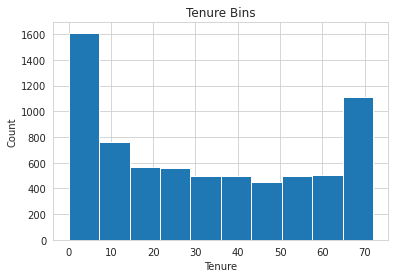

**Value Range**

Low ( 0.00 -  24.00)

Medium ( 24.00 -  48.00)

High ( 48.00 -  72.00)

,tenure,tenure-binned
0,1,Low
1,34,Medium
2,2,Low
3,45,Medium
4,2,Low
5,8,Low
6,22,Low
7,10,Low
8,28,Medium
9,62,High


<br>**Binning Distribution**<br>

Low       3210
High      2239
Medium    1594
Name: tenure-binned, dtype: int64

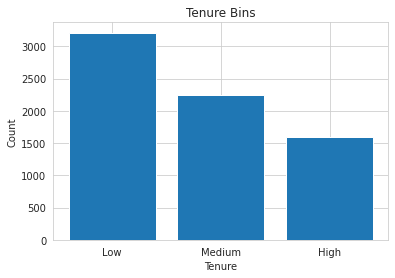

In [ ]:
binning_feature('tenure')

<a id='4.2.2'></a>
### 4.2.2 MonthlyCharges

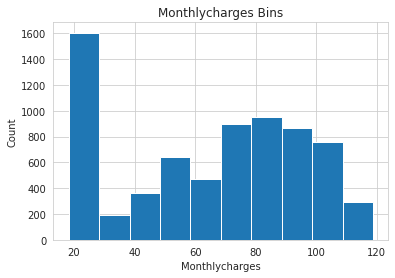

**Value Range**

Low ( 18.25 -  51.75)

Medium ( 51.75 -  85.25)

High ( 85.25 -  118.75)

,MonthlyCharges,MonthlyCharges-binned
0,29.85,Low
1,56.95,Medium
2,53.85,Medium
3,42.30,Low
4,70.70,Medium
5,99.65,High
6,89.10,High
7,29.75,Low
8,104.80,High
9,56.15,Medium


<br>**Binning Distribution**<br>

Low       2451
Medium    2439
High      2153
Name: MonthlyCharges-binned, dtype: int64

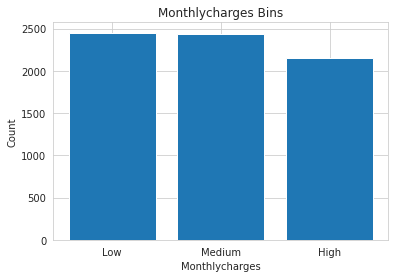

In [ ]:
binning_feature('MonthlyCharges')

<a id='4.2.3'></a>
### 4.2.3 TotalCharges

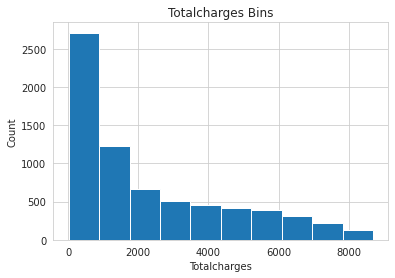

**Value Range**

Low ( 18.80 -  2907.47)

Medium ( 2907.47 -  5796.13)

High ( 5796.13 -  8684.80)

,TotalCharges,TotalCharges-binned
0,29.85,Low
1,1889.50,Low
2,108.15,Low
3,1840.75,Low
4,151.65,Low
5,820.50,Low
6,1949.40,Low
7,301.90,Low
8,3046.05,Medium
9,3487.95,Medium


<br>**Binning Distribution**<br>

Low       4778
Medium    1471
High       783
Name: TotalCharges-binned, dtype: int64

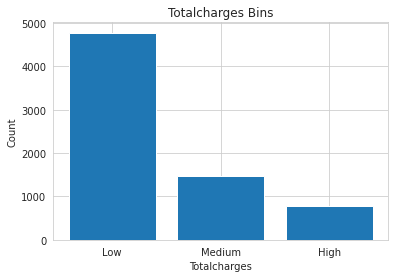

In [ ]:
binning_feature('TotalCharges')

**Data Types Distribution after cleaning**

In [ ]:
printmd("**Data Types**<br>")
df_churn.dtypes.value_counts()

**Data Types**<br>

object      16
category     3
int64        2
float64      2
dtype: int64

<a id='5'></a>
# 5 Univariate Analysis

<a id='5.1'></a>
## 5.1 Statistical Normality Tests

Normality tests are used to determine if a dataset is normally distributed and to check how likely it is for a random variable in the dataset to be normally distributed.

Popular normality tests -  D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are three numerical features in this dataset - **MonthlyCharges**, **Tenure**, and **TotalCharges**.


Hypotheses -

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.

NB : we can not perform **Shapiro-Wilk Test** because sample size > 5000 and for this test p-value may not be accurate for N > 5000

<a id='5.1.1'></a>
### 5.1.1 D’Agostino’s K^2 Test

#### MonthlyCharges

In [ ]:
stat, p = stats.normaltest(df_churn['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


#### Tenure

In [ ]:
stat, p = stats.normaltest(df_churn['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


<a id='5.1.2'></a>
### 5.1.2 Anderson-Darling Test

Hypotheses -

* H0: the sample has a Gaussian distribution
* H1: the sample does not have a Gaussian distribution

<br>


Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. \
Rather than just a single p-value, the test returns a critical value for a **range of different commonly used significance levels**. \
In this case  - **normal/exponential** (15%, 10%, 5%, 2.5%, 1%)

#### TotalCharges

In [ ]:
result = stats.anderson(df_churn['TotalCharges'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
	else:
		print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: 346.638
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


<a id='5.2'></a>
## 5.2 Visualization

### Churn (Target) Distribution

In [ ]:
fig = px.pie(df_churn['Churn'].value_counts().reset_index().rename(columns={'index':'Type'}), values='Churn', names='Type', title='Churn (Target) Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()
printmd("### Target distribution is Imbalanced")

### Target distribution is Imbalanced

### OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

In [ ]:
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=df_churn['OnlineSecurity'].value_counts().index, values=df_churn['OnlineSecurity'].value_counts().values, name="Online Security"),
              1, 1)
fig.add_trace(go.Pie(labels=df_churn['OnlineBackup'].value_counts().index, values=df_churn['OnlineBackup'].value_counts().values, name="Online Backup"),
              1, 2)
fig.add_trace(go.Pie(labels=df_churn['DeviceProtection'].value_counts().index, values=df_churn['DeviceProtection'].value_counts().values, name="Device Protection"),
              2, 1)
fig.add_trace(go.Pie(labels=df_churn['TechSupport'].value_counts().index, values=df_churn['TechSupport'].value_counts().values, name="Tech Support"),
              2, 2)

# donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent")

fig.update_layout(

    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Online<br>Security', x=0.195, y=0.85, font_size=20, showarrow=False),
                 dict(text='Online<br>Backup', x=0.805, y=0.84, font_size=20, showarrow=False),
                 dict(text='Device<br>Protection', x=0.185, y=0.18, font_size=20, showarrow=False),
                 dict(text='Tech<br>Support', x=0.805, y=0.18, font_size=20, showarrow=False)])
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()



printmd("### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution")

### 'Online Backup', 'Device Protection' and 'Online Security', 'Tech Support' has similar distribution

### PaymentMethod

In [ ]:
display(px.pie(df_churn['PaymentMethod'].value_counts().reset_index().rename(columns={'index':'Type'}), values='PaymentMethod', names='Type', title='Payment Method Distribution'))

printmd("#### Most of the customers use E-check")

#### Most of the customers use E-check

### Gender

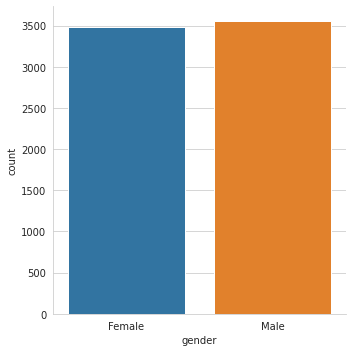

#### Approximately 50/50 gender ratio

In [ ]:
sns.catplot(x="gender", kind="count", data=df_churn)
plt.show()

printmd("#### Approximately 50/50 gender ratio")

### Dependents

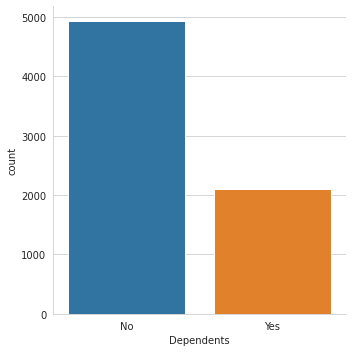

#### Users who have non-dependents are approximately two times more than users having dependents

In [ ]:
sns.catplot(x="Dependents", kind="count", data=df_churn)
plt.show()

printmd("#### Users who have non-dependents are approximately two times more than users having dependents")

### Senior Citizen

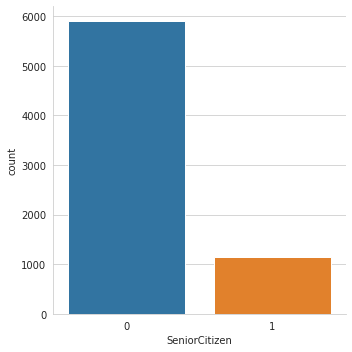

#### The majority of the users are not Senior Citizen

In [ ]:
sns.catplot(x="SeniorCitizen", kind="count", data=df_churn)
plt.show()

printmd("#### The majority of the users are not Senior Citizen")

### Contract

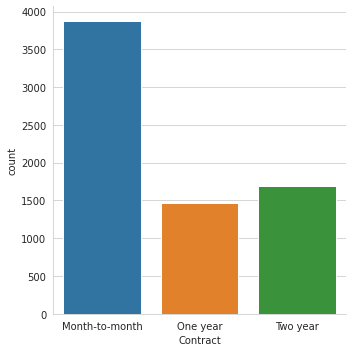

#### Most of the users prefer Month-to-month contract

In [ ]:
sns.catplot(x="Contract", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer Month-to-month contract")

### PaperlessBilling

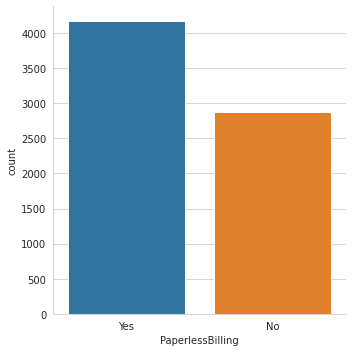

#### Most of the users prefer paperless billing

In [ ]:
sns.catplot(x="PaperlessBilling", kind="count", data=df_churn)
plt.show()

printmd("#### Most of the users prefer paperless billing")

### Total Charges

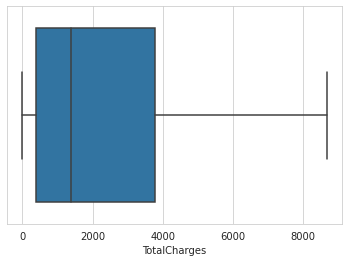

#### The total charges fall under 4000 for majority of the users

In [ ]:
sns.boxplot(x=df_churn["TotalCharges"])
plt.show()

printmd("#### The total charges fall under 4000 for majority of the users")

### Numerical Features

In [ ]:
"""#1.Create a function to plot histogram and density plot."""
def plot_histogram(feature):
    """Plots histogram and density plot of a variable."""
    
    # Create subplot object
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {feature.name} with Histogram", f"Distribution of {feature.name} with Density Plot"))
    
    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y"
        ),
    row=1,col=1)

    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = feature,
            hoverinfo="x+y",
            histnorm = "density"
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        hovermode="closest"
        )
    
    # Update axes
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Density(%)</b>")
    fig.layout.xaxis2.update(title=f"<b>{feature.name}</b>")
    return fig.show()

In [ ]:
plot_histogram(df_churn['tenure'])

printmd("**Tenure is U-shaped distributed**")

**Tenure is U-shaped distributed**

In [ ]:
plot_histogram(df_churn['MonthlyCharges'])

printmd("**MonthlyCharges is heavily skewed**")

**MonthlyCharges is heavily skewed**

In [ ]:
plot_histogram(df_churn['TotalCharges'])

printmd("**TotalCharges is reversed J-shaped distributed**")

**TotalCharges is reversed J-shaped distributed**

<a id='6'></a>
# 6 Bivariate Analysis

In this section, I did an extensive statistical analysis with various hypotheses testing based on paired data types like - 

* numerical and numerical data
* numerical and ordinal data
* ordinal and ordinal data
* categorical and categorical data


General Hypotheses - 

* H0: the two samples are independent
* H1: there is a dependency between the samples

<a id='6.1'></a>
## 6.1 List Feature Based on Types

In [ ]:
# Check cardinality of categorical variables 
target_col_filter = df_churn.loc[:, df_churn.columns != 'Churn']


cat_cols = list(set(target_col_filter.columns) - set(target_col_filter._get_numeric_data().columns))
num_cols = list(set(target_col_filter._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted to integer


# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: target_col_filter[col].nunique(), cat_cols))
dict_features_by_col = dict(zip(cat_cols, object_nunique))


# Print number of unique entries by column, in ascending order
print(sorted(dict_features_by_col.items(), key=lambda x: x[1]))


ordinal_cols = ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
dichotomous_cols = [cat for cat in cat_cols if df_churn[cat].value_counts().count() == 2]
polytomous_cols = list(set(cat_cols) - set(dichotomous_cols) - set(ordinal_cols))


print("Categorical Columns".ljust(left_padding), cat_cols)
print("Numerical Columns".ljust(left_padding), num_cols)
print("Ordinal Columns".ljust(left_padding), ordinal_cols)
print("Dichotomous Columns".ljust(left_padding), dichotomous_cols)
print("Polytomous Columns".ljust(left_padding), polytomous_cols)

[('PhoneService', 2), ('gender', 2), ('PaperlessBilling', 2), ('Dependents', 2), ('Partner', 2), ('InternetService', 3), ('tenure-binned', 3), ('TotalCharges-binned', 3), ('MultipleLines', 3), ('Contract', 3), ('DeviceProtection', 3), ('OnlineSecurity', 3), ('OnlineBackup', 3), ('TechSupport', 3), ('StreamingMovies', 3), ('MonthlyCharges-binned', 3), ('StreamingTV', 3), ('PaymentMethod', 4)]
Categorical Columns   ['PaymentMethod', 'InternetService', 'tenure-binned', 'PhoneService', 'TotalCharges-binned', 'MultipleLines', 'Contract', 'DeviceProtection', 'gender', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingMovies', 'Dependents', 'MonthlyCharges-binned', 'Partner', 'StreamingTV']
Numerical Columns     ['MonthlyCharges', 'TotalCharges', 'tenure']
Ordinal Columns       ['tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned']
Dichotomous Columns   ['PhoneService', 'gender', 'PaperlessBilling', 'Dependents', 'Partner']
Polytomous Columns    ['Payme

**Categorical Columns**
> 'TechSupport', 'DeviceProtection', 'Contract', 'PaperlessBilling', 'TotalCharges-binned', <br>'gender', 'OnlineBackup', 'InternetService', 'StreamingTV', 'tenure-binned', <br>'Dependents', 'PhoneService', 'StreamingMovies', 'MultipleLines', 'Partner', <br>'MonthlyCharges-binned', 'OnlineSecurity', 'PaymentMethod'

**Numerical Columns**
> 'MonthlyCharges', 'tenure', 'TotalCharges'

**Ordinal Columns**
> tenure-binned', 'MonthlyCharges-binned', 'TotalCharges-binned'

**Dichotomous Columns**
> 'PaperlessBilling', 'gender', 'Dependents', 'PhoneService', 'Partner'

**Polytomous Columns**
> 'TechSupport', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'Contract',<br> 'InternetService', 'OnlineSecurity', 'StreamingTV', 'PaymentMethod', 'OnlineBackup'

<a id='6.2'></a>
## 6.2 Numerical & Numerical

<a id='6.2.1'></a>
### 6.2.1 Spearman rank-order correlation
---
AKA Spearman's rho or Spearman correlation coefficient\
Applied to **Continuous or ordinal**

<br>

**Unlike the Pearson correlation**, the Spearman correlation does not assume that both datasets are **normally distributed**

Pearson correlation assumes normality, linearity and homoscedasticity.Pearson's correlation is also not able to tell the difference between dependent and independent variables

Hypotheses -

* H0: the two samples do not have monotonic relationship
* H1: there is a monotonic relationship between the samples

For Pearson r correlation, both variables should be normally distributed

According to the normality test tenure, MonthlyCharges and TotalCharges columns are **not normally distributed** 

In [ ]:
def cal_spearmanr(c1, c2):

  alpha = 0.05

  correlation, p_value = stats.spearmanr(df_churn[c1], df_churn[c2])

  print(f'{c1}, {c2} correlation : {correlation}, p : {p_value}')

  if p_value > alpha:
    print('Probably do not have monotonic relationship (fail to reject H0)')
  else:
    print('Probably have monotonic relationship (reject H0)')

In [ ]:
cal_spearmanr('tenure','MonthlyCharges')

tenure, MonthlyCharges correlation : 0.27641678933130215, p : 1.0271266876409408e-123
Probably have monotonic relationship (reject H0)


In [ ]:
cal_spearmanr('tenure','TotalCharges')

tenure, TotalCharges correlation : 0.1335958253944717, p : 2.062335511455103e-29
Probably have monotonic relationship (reject H0)


In [ ]:
cal_spearmanr('MonthlyCharges','TotalCharges')

MonthlyCharges, TotalCharges correlation : 0.2851093518219916, p : 7.880164569887811e-132
Probably have monotonic relationship (reject H0)


<a id='6.3'></a>
## 6.3 Numerical & Categorical

<a id='6.3.1'></a>
### 6.3.1 Kendall rank correlation coefficient 
---
AKA **Kendall's τ** or **Kendall's Tau**

Kendall’s Tau is often used for correlation on continuous data if there are outliers in the data

A τ test is a non-parametric hypothesis test for statistical dependence based on the τ coefficient

Variable would be **continuous or ordinal**

Ordinal variable examples - 
* age, weight, height, test scores, survey scores, yearly salary, etc
* education level (GDE/Bachelors/Masters/PhD), income level (if grouped into high/medium/low) etc

In this dataset there are three ordinal features : 
* tenure-binned  
* MonthlyCharges-binned 
* TotalCharges-binned

In [ ]:
def kendall_rank_correlation(feature1, feature2):

  coef, p_value = stats.kendalltau(df_churn[feature1], df_churn[feature2])
  print(f"Correlation between {feature1} and {feature2} ")
  print('Kendall correlation coefficient = %.5f, p = %.5f' % (coef, p_value))

  # interpret the significance
  alpha = 0.05
  if p_value > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
  else:
    print('Samples are correlated (reject H0) p=%.3f' % p_value)
  print('----\n')

In [ ]:
ordinal_features = ['tenure-binned','MonthlyCharges-binned', 'TotalCharges-binned']

for ord in ordinal_features:
  printmd(f"Correlation with **{ord}**")
  kendall_rank_correlation('tenure',ord)
  kendall_rank_correlation('MonthlyCharges',ord)
  kendall_rank_correlation('TotalCharges',ord)

Correlation with **tenure-binned**

Correlation between tenure and tenure-binned 
Kendall correlation coefficient = -0.28746, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and tenure-binned 
Kendall correlation coefficient = -0.10710, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and tenure-binned 
Kendall correlation coefficient = -0.23680, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **MonthlyCharges-binned**

Correlation between tenure and MonthlyCharges-binned 
Kendall correlation coefficient = -0.16485, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.22506, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between TotalCharges and MonthlyCharges-binned 
Kendall correlation coefficient = -0.20858, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



Correlation with **TotalCharges-binned**

Correlation between tenure and TotalCharges-binned 
Kendall correlation coefficient = 0.07424, p = 0.00000
Samples are correlated (reject H0) p=0.000
----

Correlation between MonthlyCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.00298, p = 0.75152
Samples are uncorrelated (fail to reject H0) p=0.752
----

Correlation between TotalCharges and TotalCharges-binned 
Kendall correlation coefficient = 0.12334, p = 0.00000
Samples are correlated (reject H0) p=0.000
----



<a id='6.3.2'></a>
### 6.3.2 Mann-Whitney U Test

The Mann-Whitney U test is a **nonparametric** statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

The test determines whether the medians of two or more groups are different.

**NB** : For the test to be effective, it requires **at least 20 observations** in each data sample.

* Fail to Reject H0: Sample distributions are equal. (or sample distributions are likely drawn from the same population)
* Reject H0: Sample distributions are not equal.

or

* H0: population medians are equal.
* H1: population medians are not equal.

### Correlation with Target (Dichotomous)

In [ ]:
def mannwhitneyu_correlation(feature1):
  stat, p_value = stats.mannwhitneyu(df_churn[feature1], (df_churn['Churn'] == 'Yes').astype(int))
  print(f"Correlation between {feature1} and Churn")
  print('Statistics = %.5f, p = %.5f' % (stat, p_value))
  
  # interpret the significance
  alpha = 0.05
  if p_value > alpha:
      print('Same distribution (fail to reject H0)')
  else:
      print('Different distribution (reject H0)')
  print('----\n') 

In [ ]:
numerical_features = ['tenure','MonthlyCharges', 'TotalCharges']

for num in numerical_features:
  printmd(f"Correlation with **{num}**")
  mannwhitneyu_correlation(num)

Correlation with **tenure**

Correlation between tenure and Churn
Statistics = 48981984.50000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **MonthlyCharges**

Correlation between MonthlyCharges and Churn
Statistics = 49603849.00000, p = 0.00000
Different distribution (reject H0)
----



Correlation with **TotalCharges**

Correlation between TotalCharges and Churn
Statistics = 49554833.00000, p = 0.00000
Different distribution (reject H0)
----



**Biserial correlation**

The point biserial correlation is used to measure the relationship between a **binary variable, x, and a continuous variable, y**. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

NB: point-biserial correlation is conducted with the Pearson correlation formula except that one of the variables is dichotomous

The assumptions for Point-Biserial correlation include:

* Continuous and Binary
* **Normally Distributed** (In our case not normal)
* No Outliers
* Equal Variances

Options to normalize a non-normal distribution - 
 
* Log transform
* Square root transform
* Box cox (can only be applied to strictly positive data)
* Yeo Johnson (both positive and negative)

In [ ]:
# https://stackoverflow.com/questions/53624804/how-to-normalize-a-non-normal-distribution

data = df_churn['MonthlyCharges'].to_numpy()
pt = PowerTransformer(method='yeo-johnson') # ‘box-cox’, 'yeo-johnson'
data = data.reshape(-1, 1)
pt.fit(data)
transformed_data = pt.transform(data)

transformed_k2, transformed_p = stats.normaltest(transformed_data)

# other methods to transform into gaussian distribution

# stats.normaltest(np.log(df_churn['MonthlyCharges']))
# stats.normaltest(np.sqrt(df_churn['MonthlyCharges'])
# stats.normaltest(stats.boxcox(df_churn['MonthlyCharges'])[0])

# all other methods failed to convert into gaussian


alpha = 0.05
if transformed_p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


**Since the numerical columns can not be converted to gaussian distribution, point biseral correlation test can not be performed**

<a id='6.3.3'></a>
### 6.3.3 Polytomous(Nominal) with numeric

For a dichotomous categorical variable and a continuous variable we can calculate a Pearson correlation if the categorical variable has a 0/1-coding for the categories. This correlation is then also known as a point-biserial correlation coefficient. (parametric test)

But when we have **more than two categories** for the categorical variable the Pearson correlation is not appropriate anymore. \
We should then use **eta-squared, or eta**, as an effect-size measure for the relationship of a **categorical variable and a continuous variable**.


In [ ]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [ ]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['MonthlyCharges'])

0.40127388087245935

In [ ]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['TotalCharges'])

0.35074070554475645

In [ ]:
correlation_ratio(df_churn['PaymentMethod'], df_churn['tenure'])

0.3998293691962001

<a id='6.4'></a>
## 6.4 Dichotomous & Dichotomous

In classification, when both of them are categorical, then the strength of the relationship between them can be measured using a **Chi-square test**

<a id='6.4.1'></a>
### 6.4.1 Phi’s correlation 
---
AKA **Matthews correlation coefficient (MCC)**


In [ ]:
printmd("**Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
  print(col.ljust(left_padding), matthews_corrcoef(df_churn[col], df_churn['Churn']))

**Correlation Between Dichotomous Features with Target : Churn**

PaperlessBilling      0.1918253316664679
gender                0.0
Dependents            -0.16422140157972528
PhoneService          0.01194198002900308
Partner               -0.15044754495917656


<a id='6.5'></a>
## 6.5 Categorical & categorical 

<a id='6.5.1'></a>
### 6.5.1 Chi-Square

detect independence between 2 categorical variables, 2x2 or 2xMany

Test statistic in the context of the chi-squared distribution with the requisite number of degrees of freedom

* If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

In terms of a p-value and a chosen significance level (alpha):

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

![image](https://user-images.githubusercontent.com/40615350/114787798-2a027900-9da2-11eb-972e-c5e52a9a628f.png)

In [ ]:
# alpha/significance = 0.05
# If p-value <= alpha: significant result, reject null hypothesis (H0), dependent
# If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent

def calculate_chi_square(feature1, feature2='Churn'):
  printmd(f"Correlation between **{feature1}** and **{feature2}**")
  crosstab = pd.crosstab(df_churn[feature1], df_churn[feature2])
  # display(crosstab)
  stat, p, dof, expected = stats.chi2_contingency(crosstab,correction=True)


  print(f'p-value : {p}, degree of freedom: {dof}')
  # print("expected frequencies :\n", expected)

  # interpret test-statistic
  prob = 0.95
  critical = stats.chi2.ppf(prob, dof)
  print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

  if abs(stat) >= critical:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  
  # interpret p-value
  alpha = 1.0 - prob
  
  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p <= alpha:
    print('Dependent (reject H0)')
  else:
    print('Independent (fail to reject H0)')
  print('-----------------------------------\n')

# credit : https://machinelearningmastery.com/chi-squared-test-for-machine-learning

#### Dichotomous Features

In [ ]:
printmd("**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**")

for col in dichotomous_cols:
  calculate_chi_square(col)


**Chi-Squre Correlation Between Dichotomous Features with Target : Churn**

Correlation between **PhoneService** and **Churn**

p-value : 0.3387825358066928, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.915
Independent (fail to reject H0)
significance=0.050, p=0.339
Independent (fail to reject H0)
-----------------------------------



Correlation between **gender** and **Churn**

p-value : 0.48657873605618596, degree of freedom: 1
probability=0.950, critical=3.841, stat=0.484
Independent (fail to reject H0)
significance=0.050, p=0.487
Independent (fail to reject H0)
-----------------------------------



Correlation between **PaperlessBilling** and **Churn**

p-value : 4.073354668665985e-58, degree of freedom: 1
probability=0.950, critical=3.841, stat=258.278
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Dependents** and **Churn**

p-value : 4.9249216612154196e-43, degree of freedom: 1
probability=0.950, critical=3.841, stat=189.129
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Partner** and **Churn**

p-value : 2.1399113440759935e-36, degree of freedom: 1
probability=0.950, critical=3.841, stat=158.733
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



**With 5% significance level 'PhoneService' and 'gender' features are not dependent with the target : Churn**

### Polytomous Features

In [ ]:
printmd("**Chi-Squre Correlation Between Polytomous Features with Target : Churn**")

for col in polytomous_cols:
  calculate_chi_square(col)

**Chi-Squre Correlation Between Polytomous Features with Target : Churn**

Correlation between **PaymentMethod** and **Churn**

p-value : 3.6823546520097993e-140, degree of freedom: 3
probability=0.950, critical=7.815, stat=648.142
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineBackup** and **Churn**

p-value : 2.0797592160864276e-131, degree of freedom: 2
probability=0.950, critical=5.991, stat=601.813
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **InternetService** and **Churn**

p-value : 9.571788222840544e-160, degree of freedom: 2
probability=0.950, critical=5.991, stat=732.310
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **TechSupport** and **Churn**

p-value : 1.4430840279998987e-180, degree of freedom: 2
probability=0.950, critical=5.991, stat=828.197
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **StreamingMovies** and **Churn**

p-value : 2.667756755723681e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=375.661
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **MultipleLines** and **Churn**

p-value : 0.0034643829548773, degree of freedom: 2
probability=0.950, critical=5.991, stat=11.330
Dependent (reject H0)
significance=0.050, p=0.003
Dependent (reject H0)
-----------------------------------



Correlation between **OnlineSecurity** and **Churn**

p-value : 2.661149635176552e-185, degree of freedom: 2
probability=0.950, critical=5.991, stat=849.999
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **Contract** and **Churn**

p-value : 5.863038300673391e-258, degree of freedom: 2
probability=0.950, critical=5.991, stat=1184.597
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **DeviceProtection** and **Churn**

p-value : 5.505219496457244e-122, degree of freedom: 2
probability=0.950, critical=5.991, stat=558.419
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



Correlation between **StreamingTV** and **Churn**

p-value : 5.528994485739183e-82, degree of freedom: 2
probability=0.950, critical=5.991, stat=374.204
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



**With 5% significance level All polytomous features are dependent with the target : Churn**

<a id='6.5.2'></a>
###  6.5.2 Cramér’s V
---
It is based on a nominal variation of **Pearson’s Chi-Square** Test\
Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

Cramer's V is used to examine the association between **two categorical variables when there is more than a 2 X 2 contingency** (e.g., 2 X 3).\
In these more complicated designs, **phi correlation test** is not appropriate, but Cramer's statistic is. Cramer's V represents the association or correlation between two variables. This statistic is also referred to as **"Cramers Phi"**

To know more about this, visit this article : [the-search-for-categorical-correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)

In [ ]:
def cramers_v(x, y):
  """ calculate Cramers V statistic for categorial-categorial association.
      uses correction from Bergsma and Wicher,
      Journal of the Korean Statistical Society 42 (2013): 323-328
  """
  confusion_matrix = pd.crosstab(x,y)
  chi2 = stats.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  phi2 = chi2/n
  r,k = confusion_matrix.shape
  phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
  rcorr = r-((r-1)**2)/(n-1)
  kcorr = k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# credit : https://stackoverflow.com/a/46498792/11105356

In [ ]:
printmd("**Correlation Between Polytomous Features with Target : Churn**")
cramer_v_val_dict = {}
for col in polytomous_cols:
  cramer_v_val_dict[col] = cramers_v(df_churn[col], df_churn['Churn'])

cramer_v_val_dict_sorted = sorted(cramer_v_val_dict.items(), key=lambda x:x[1], reverse=True)

for k,v in cramer_v_val_dict_sorted:
  print(k.ljust(left_padding), v)

printmd("<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>")            

**Correlation Between Polytomous Features with Target : Churn**

Contract              0.40979839182553446
OnlineSecurity        0.34701606688272874
TechSupport           0.3425261587493695
InternetService       0.3220367323307425
PaymentMethod         0.3026771381187204
OnlineBackup          0.291850036724674
DeviceProtection      0.28109492388964397
StreamingMovies       0.23035147282444215
StreamingTV           0.22990176915403474
MultipleLines         0.03639958908232507


<br>**Contract, OnlineSecurity, TechSupport, InternetService are moderately correlated with Churn**<br>

**Cramers V Heatmap on Polytomous Features and Target: Churn**

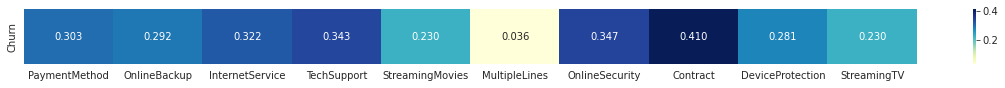

In [ ]:
printmd("**Cramers V Heatmap on Polytomous Features and Target: Churn**")
cramers_v_val = pd.DataFrame(index=['Churn'], columns=polytomous_cols)

for j in range(0,len(polytomous_cols)):
  u = cramers_v(df_churn['Churn'], df_churn[polytomous_cols[j]])
  cramers_v_val.loc[:,polytomous_cols[j]] = u

cramers_v_val.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(cramers_v_val,annot=True,fmt='.3f', cmap="YlGnBu")
plt.show()

#### Using Scipy Module

In [ ]:
crosstab = pd.crosstab(df_churn['OnlineSecurity'], df_churn['Churn'])
display(crosstab)
printmd(f"Association between OnlineSecurity and Target:Churn **{stats.contingency.association(crosstab, method='cramer')}**")

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


Association between OnlineSecurity and Target:Churn **0.3474004326740552**

<a id='6.5.3'></a>
### 6.5.3 Uncertainty Coefficient
---


AKA **Theil’s U** - an **asymmetric** measure of association between categorical features

It is is based on the conditional entropy between x and y — or in human language, given the value of x, how many possible states does y have, and how often do they occur. 

Formaly marked as U(x|y); Just like Cramer’s V, the output value is on the range of [0,1], where 0 means that feature y provides no information about feature x, and 1 means that feature y provides full information about features x's value 

**Unlike Cramer’s V, it is asymmetric**

So we will not lose any valuable information unlike symmetric tests 

In [ ]:
def conditional_entropy(x,y):
  # entropy of x given y
  y_counter = Counter(y)
  xy_counter = Counter(list(zip(x,y)))
  total_occurrences = sum(y_counter.values())
  entropy = 0
  for xy in xy_counter.keys():
      p_xy = xy_counter[xy] / total_occurrences
      p_y = y_counter[xy[1]] / total_occurrences
      entropy += p_xy * math.log(p_y/p_xy)
  return entropy

def theil_u(x,y):
  s_xy = conditional_entropy(x,y)
  x_counter = Counter(x)
  total_occurrences = sum(x_counter.values())
  p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
  s_x = stats.entropy(p_x)
  if s_x == 0:
      return 1
  else:
      return (s_x - s_xy) / s_x

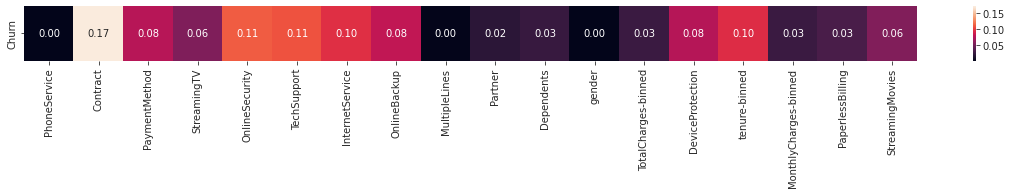

**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**

In [ ]:
theilu = pd.DataFrame(index=['Churn'], columns=cat_cols)

for j in range(0,len(cat_cols)):
  u = theil_u(df_churn['Churn'].tolist(),df_churn[cat_cols[j]].tolist())
  theilu.loc[:,cat_cols[j]] = u

theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

printmd("**Contract, OnlineSecurity, TechSupport, tenure-binned are moderately correlated with Churn**")            

<a id='6.6'></a>
## 6.6 Collinearity

For categorical variables, multicollinearity can be detected with **Spearman rank correlation coefficient** (ordinal variables) and **chi-square** test (nominal variables)

For categorical and a continuous variable, multicollinearity can be measured by t-test (if the categorical variable has 2 categories, parametric) or ANOVA (more than 2 categories, parametric)

Spearman's ρ was already performed, proceeding with chi-square 


<a id='6.6.1'></a>
### 6.6.1 Chi-Square

In [ ]:
calculate_chi_square('PaymentMethod','MultipleLines')

Correlation between **PaymentMethod** and **MultipleLines**



p-value : 1.1367151062832025e-81, degree of freedom: 6
probability=0.950, critical=12.592, stat=392.514
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



In [ ]:
calculate_chi_square('PaymentMethod','PhoneService')

Correlation between **PaymentMethod** and **PhoneService**



p-value : 0.8621473788722153, degree of freedom: 3
probability=0.950, critical=7.815, stat=0.747
Independent (fail to reject H0)
significance=0.050, p=0.862
Independent (fail to reject H0)
-----------------------------------



In [ ]:
calculate_chi_square('PaymentMethod','Contract')

Correlation between **PaymentMethod** and **Contract**



p-value : 4.067638353787387e-213, degree of freedom: 6
probability=0.950, critical=12.592, stat=1001.582
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
-----------------------------------



<a id='6.7'></a>
## 6.7 Visualization

### Tenure and MonthlyCharges Distribution

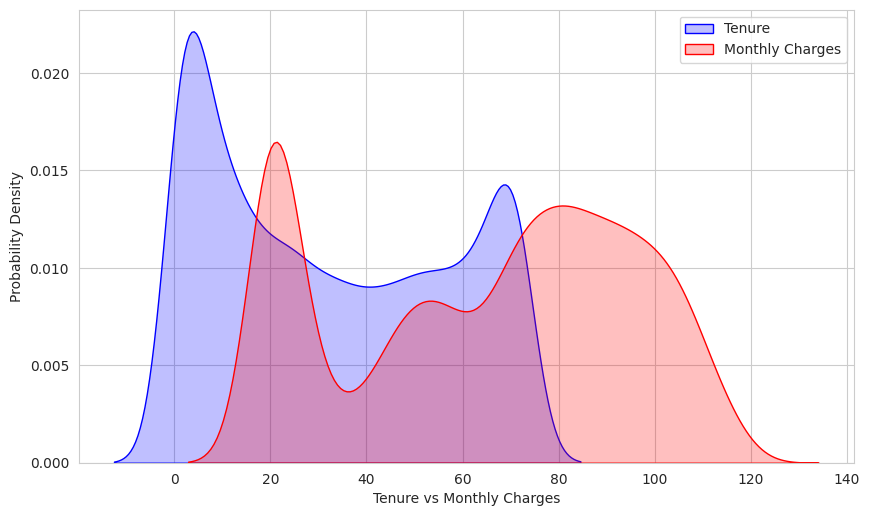

**Both are are not normally distributed, skewed,Tenure has a 
Bi-modal distribution <br>Most users stayed for less than 20 months, 
Monthly Charges for most people is nearly 20 unit**

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.kdeplot(df_churn.tenure, color='b', shade=True, Label='Tenure')
sns.kdeplot(df_churn.MonthlyCharges, color='r', shade=True, Label='Monthly Charges')
  
plt.xlabel('Tenure vs Monthly Charges')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

printmd("""**Both are are not normally distributed, skewed,Tenure has a 
Bi-modal distribution <br>Most users stayed for less than 20 months, 
Monthly Charges for most people is nearly 20 unit**""")

In [ ]:
# https://stackoverflow.com/a/65242391/11105356

df_g = df_churn.groupby(['StreamingTV', 'Churn']).size().reset_index()
df_g['percentage'] = df_churn.groupby(['StreamingTV', 'Churn']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['StreamingTV', 'Churn', 'Counts', 'Percentage']

fig = px.bar(df_g, x='StreamingTV', y='Counts', 
       color='Churn',
       color_discrete_map={
        'Yes': '#99D594',
        'No': '#FC8D59',
    }, 
    text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

display(fig)
printmd("**Similar ratio between streamer vs non-streamer in churned users**")

**Similar ratio between streamer vs non-streamer in churned users**

### Contract and Churn

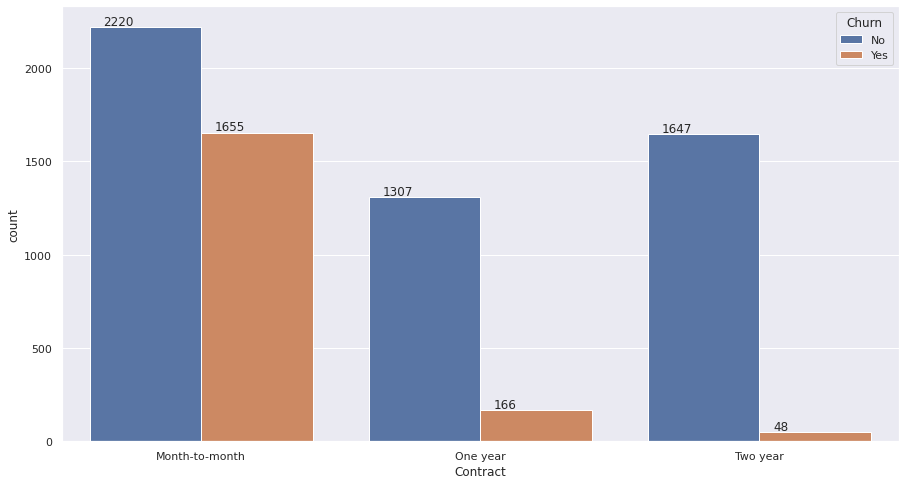

**Most churned users has Month-to-month contract**

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Contract',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users has Month-to-month contract**")

### OnlineSecurity and Churn

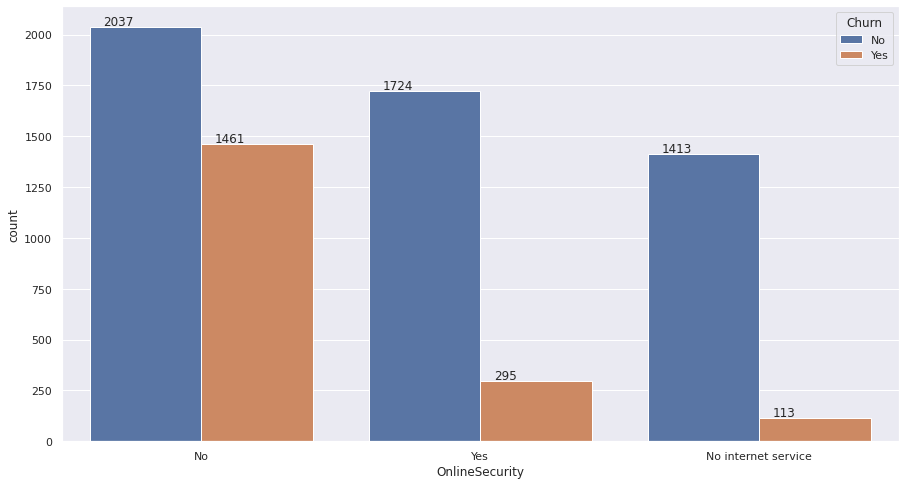

**Most churned users didn't have online security**

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='OnlineSecurity',hue='Churn',data=df_churn)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

printmd("**Most churned users didn't have online security**")

### Partner and Churn

**Most users who churned does not have a partner in contrast to the users who does**

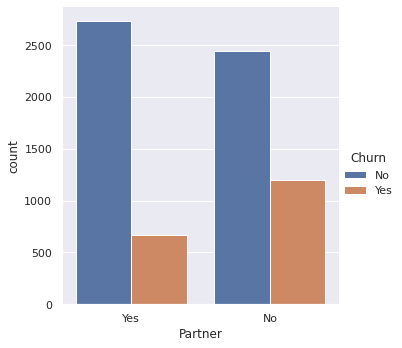

In [ ]:
sns.catplot(x='Partner',hue='Churn',data=df_churn, kind="count");

printmd("**Most users who churned does not have a partner in contrast to the users who does**")

### Gender, TotalCharges and Churn

**Gender is uncorrelated with churn rate**

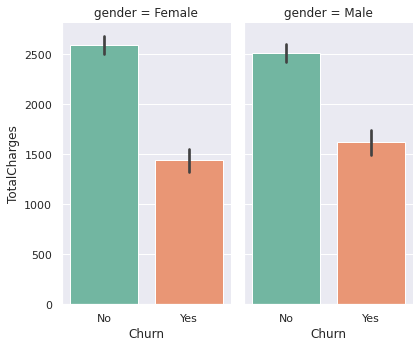

In [ ]:
sns.catplot(x='Churn',y='TotalCharges', col = 'gender', data=df_churn,
                kind='bar', aspect=.6, palette='Set2')

printmd("**Gender is uncorrelated with churn rate**")

### Checking Outliers

In [ ]:
px.box(df_churn, x="Churn", y="MonthlyCharges")

In [ ]:
px.box(df_churn, x="Churn", y="TotalCharges")

In [ ]:
px.box(df_churn, x="Churn", y="tenure")

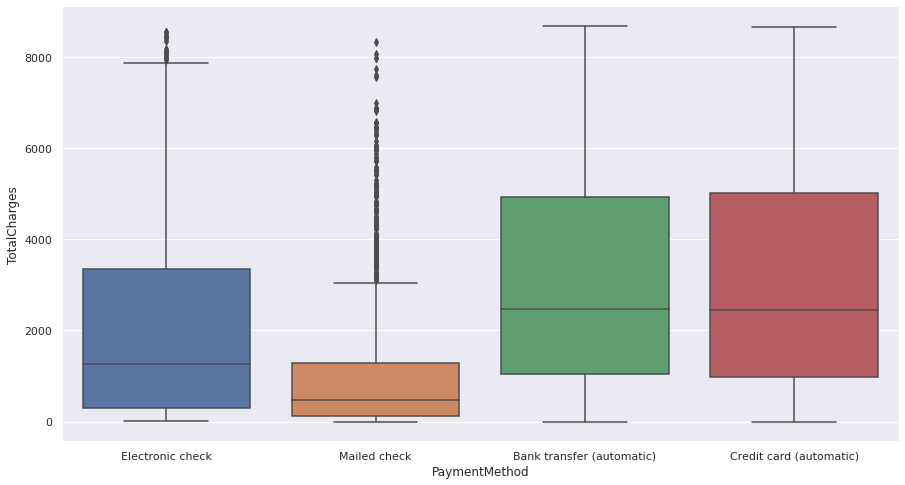

**Total Charges for many users are in extreme level in Mailed Check payment method**

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="TotalCharges", data=df_churn)
plt.show()

printmd("**Total Charges for many users are in extreme level in Mailed Check payment method**")

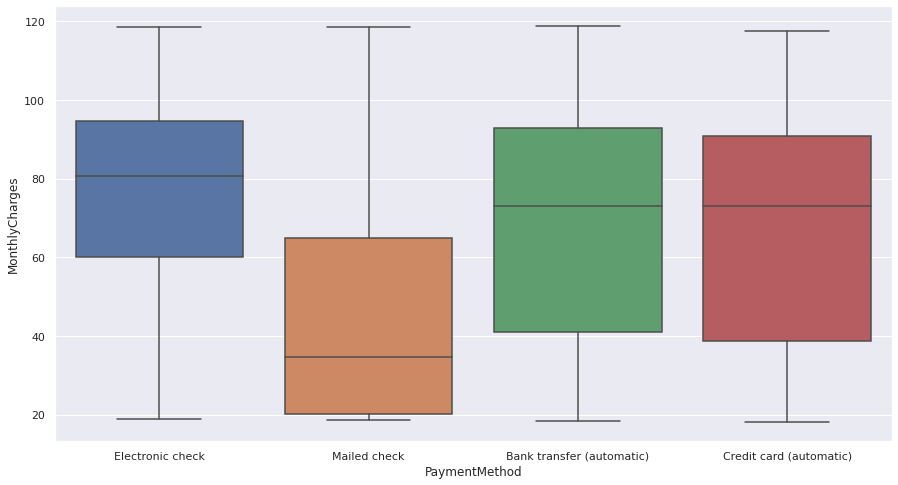

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="PaymentMethod", y="MonthlyCharges", data=df_churn)
plt.show()

<a id='7'></a>
# 7 Multivariate Analysis

<a id='7.1'></a>
### 7.1 Multicollinearity (Kruskal–Wallis)


The test is more commonly used when we have **three or more levels**. For two levels, the **Mann Whitney U Test** is appropriate 

The **parametric equivalent of the Kruskal–Wallis test** is the one-way analysis of variance (ANOVA)

Hypothses - 

* Fail to Reject H0: All sample distributions are equal.
* Reject H0: One or more sample distributions are not equal.


In [ ]:
# compare samples
stat, p = stats.kruskal(df_churn['TotalCharges'], df_churn['tenure'], df_churn['MonthlyCharges'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=13184.759, p=0.000
Different distributions (reject H0)


In [ ]:
# compare samples
stat, p = stats.kruskal(df_churn['DeviceProtection'], df_churn['StreamingMovies'], df_churn['PhoneService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=4696.340, p=0.000
Different distributions (reject H0)


In [ ]:
# compare samples
stat, p = stats.kruskal(df_churn['Contract'], df_churn['PaymentMethod'], df_churn['PhoneService'], df_churn['InternetService'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=22407.812, p=0.000
Different distributions (reject H0)


<a id='7.2'></a>
## 7.2 Frequency Distribution

In [ ]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df_churn.Churn):
    
    fig,ax = plt.subplots(1,1,figsize = (18,5))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

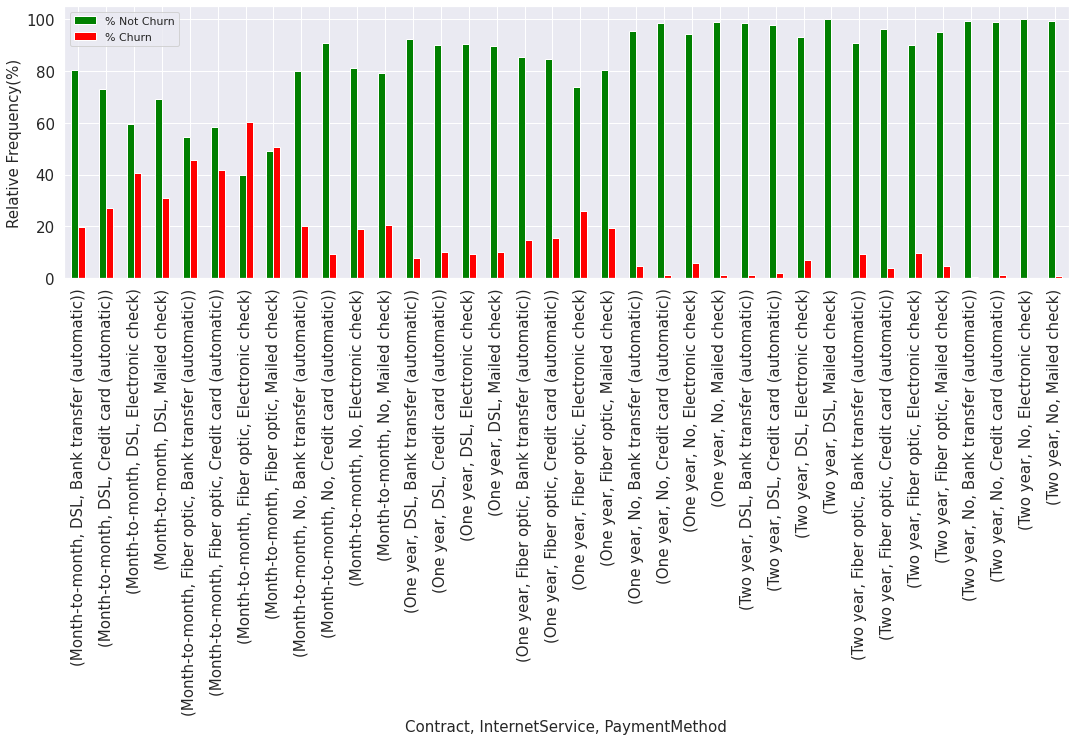

### Findings: Most of the users who churned had a Month-to-month contract and had internet service

In [ ]:
multivariate_analysis(df_churn.Contract, df_churn.InternetService, df_churn.PaymentMethod)
printmd("### Findings: Most of the users who churned had a Month-to-month contract and had internet service")

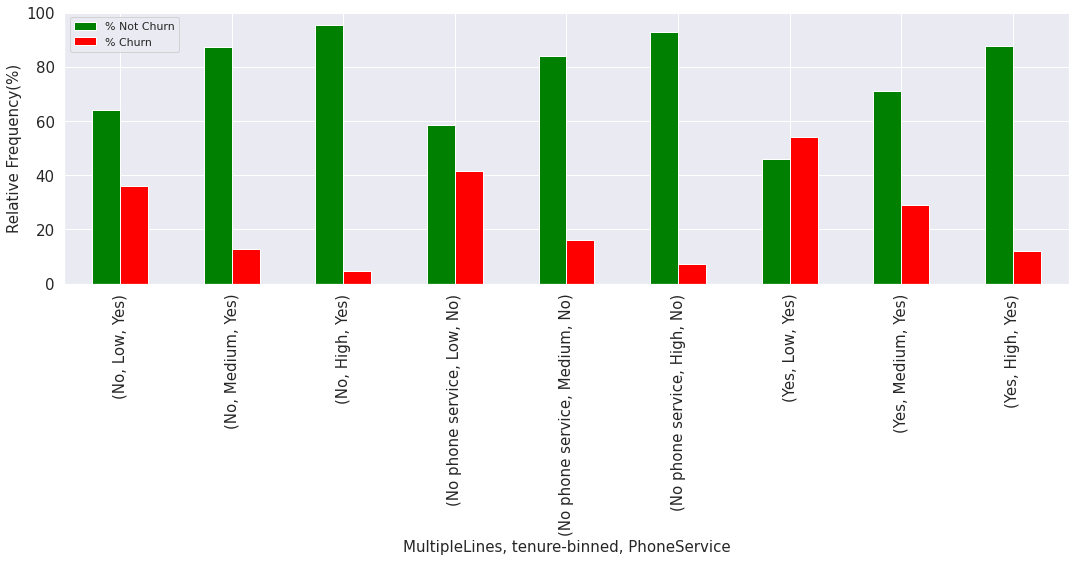

## Findings: Most of the users who churned had phone service

In [ ]:
multivariate_analysis(df_churn.MultipleLines, df_churn['tenure-binned'], df_churn.PhoneService)
printmd("## Findings: Most of the users who churned had phone service")

<a id='7.3'></a>
## 7.3 Churn Count Distribution

In [ ]:
def plot_counting_distribution(cardinality_value):

  #label encoding binary columns
  le = LabelEncoder()

  tmp_churn = df_churn[df_churn['Churn'] == 'Yes']
  tmp_no_churn = df_churn[df_churn['Churn'] == 'No']

  selected_columns = df_churn.nunique()[df_churn.nunique() == cardinality_value].keys()

  for col in selected_columns :
      tmp_churn[col] = le.fit_transform(tmp_churn[col])
      

  data_frame_x = tmp_churn[selected_columns].sum().reset_index()
  data_frame_x.columns = ["feature","Yes"]
  data_frame_x["No"] = tmp_churn.shape[0]  - data_frame_x["Yes"]
  data_frame_x = data_frame_x[data_frame_x["feature"] != "Churn"]

  #count of 1's(yes)
  trace1 = go.Scatterpolar(r=data_frame_x["Yes"].values.tolist(), 
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself", name="Churn 1's",
                          mode="markers+lines", visible=True,
                          marker=dict(size=5)
                          )

  #count of 0's(No)
  trace2 = go.Scatterpolar(r=data_frame_x["No"].values.tolist(),
                          theta=data_frame_x["feature"].tolist(),
                          fill="toself",name="Churn 0's",
                          mode="markers+lines", visible=True,
                          marker=dict(size = 5)
                          ) 
  for col in selected_columns :
      tmp_no_churn[col] = le.fit_transform(tmp_no_churn[col])
      
  data_frame_x = tmp_no_churn[selected_columns].sum().reset_index()
  data_frame_x.columns  = ["feature","Yes"]
  data_frame_x["No"]    = tmp_no_churn.shape[0]  - data_frame_x["Yes"]
  data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

  #count of 1's(yes)
  trace3 = go.Scatterpolar(r = data_frame_x["Yes"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 1's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          )

  #count of 0's(No)
  trace4 = go.Scatterpolar(r = data_frame_x["No"].values.tolist(),
                          theta = data_frame_x["feature"].tolist(),
                          fill  = "toself",name = "NoChurn 0's",
                          mode = "markers+lines", visible=False,
                          marker = dict(size = 5)
                          ) 

  data = [trace1, trace2, trace3, trace4]

  updatemenus = list([
      dict(active=0,
          x=-0.15,
          buttons=list([  
              dict(
                  label = 'Churn Dist',
                  method = 'update',
                  args = [{'visible': [True, True, False, False]}, 
                      {'title': f'Customer Churn Binary Counting Distribution' }]),
              
              dict(
                    label = 'No-Churn Dist',
                  method = 'update',
                  args = [{'visible': [False, False, True, True]},
                      {'title': f'No Customer Churn Binary Counting Distribution'}]),

          ]),
      )
  ])

  layout = dict(title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)', 
                showlegend=False,
                updatemenus=updatemenus)

  fig = dict(data=data, layout=layout)

  pio.show(fig)

# Thanks to : https://www.kaggle.com/kabure/insightful-eda-churn-customers-models-pipeline#Feature-Engineering

<a id='7.3.1'></a>
###  7.3.1 Features With Cardinality = 2

In [ ]:
plot_counting_distribution(2)

<a id='7.3.2'></a>
###  7.3.2 Features With Cardinality = 3

In [ ]:
plot_counting_distribution(3)

<a id='8'></a>

# 8 Feature Engineering

For classification generally these methods are used: chi2, f_classif, mutual_info_classif

* **chi2**: Computes chi-squared stats between each non-negative feature and class. This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

* **f_classif**: Compute the ANOVA F-value for the provided sample.

* **mutual_info_classif**: Estimates mutual information for a discrete target variable. Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

source= https://scikit-learn.org/stable/modules/feature_selection.html




**N.B** : I may apply One Hot Encoding for the categorical columns, But to compare the correlation results obtained from previous notebook with model feature importance I am keeping the feature set as it is ,applying only ordinal encoding

In [ ]:
# remove features based on feature importance
# df_churn_cleaned.drop(['gender','Partner','PhoneService','MultipleLines','StreamingMovies'], axis=1, inplace=True)


df_churn_ohe = pd.get_dummies(df_churn_cleaned)

# remove duplicated columns after on hot encoding
df_churn_ohe.drop(['MultipleLines_No phone service', 
               'OnlineSecurity_No internet service',
               'OnlineBackup_No internet service',
               'DeviceProtection_No internet service',
               'TechSupport_No internet service',
               'StreamingTV_No internet service',
               'StreamingMovies_No internet service'],axis=1, inplace=True)

<a id='8.1'></a>
## 8.1 Encode Target variable

In [ ]:
df_churn_cleaned = df_churn.copy()
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'yes'] = 1
df_churn_cleaned.Churn[df_churn_cleaned.Churn.str.lower() == 'no'] = 0

df_churn_cleaned['Churn'] = df_churn_cleaned['Churn'].astype('float')

In [ ]:
df_churn_cleaned.to_csv("Telco-Customer-Churn-dataset-cleaned.csv", index=False)

In [ ]:
printmd("**Column Info**")
display(df_churn_cleaned.info())
printmd("<br>**Datatypes Count**")
display(df_churn.dtypes.value_counts())
printmd("<br>**Categorical Features**")
display(df_churn.describe(include=['object']).T)

**Column Info**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 7043 non-null   object  
 1   SeniorCitizen          7043 non-null   int64   
 2   Partner                7043 non-null   object  
 3   Dependents             7043 non-null   object  
 4   tenure                 7043 non-null   int64   
 5   PhoneService           7043 non-null   object  
 6   MultipleLines          7043 non-null   object  
 7   InternetService        7043 non-null   object  
 8   OnlineSecurity         7043 non-null   object  
 9   OnlineBackup           7043 non-null   object  
 10  DeviceProtection       7043 non-null   object  
 11  TechSupport            7043 non-null   object  
 12  StreamingTV            7043 non-null   object  
 13  StreamingMovies        7043 non-null   object  
 14  Contract               7043 non-null   o

None

<br>**Datatypes Count**

object      16
category     3
float64      2
int64        2
dtype: int64

<br>**Categorical Features**

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


<a id='9'></a>
# 9 Data Preparation

<a id='9.1'></a>
## 9.1 Prepare Train/Test dataset

In [ ]:
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
for train_index, test_index in strat_split.split(df_churn_cleaned, df_churn_cleaned["Churn"]):
    strat_train_set = df_churn_cleaned.loc[train_index]
    strat_test_set = df_churn_cleaned.loc[test_index]

print('Target Labels Ratio in Original Dataset\n')
print(df_churn_cleaned["Churn"].value_counts(normalize=True).sort_index())
# df_churn_cleaned["Churn"].value_counts() / len(strat_test_set)

print('\nTarget Labels Ratio in Test Dataset\n')
print(strat_test_set["Churn"].value_counts(normalize=True).sort_index())
# strat_test_set["Churn"].value_counts() / len(strat_test_set)

Target Labels Ratio in Original Dataset

0.0    0.73463
1.0    0.26537
Name: Churn, dtype: float64

Target Labels Ratio in Test Dataset

0.0    0.734564
1.0    0.265436
Name: Churn, dtype: float64


In [ ]:
# train Dataset
X = strat_train_set.drop("Churn", axis=1)
y = strat_train_set["Churn"].copy()

# test dataset
y_test = strat_test_set['Churn'].values
X_test = strat_test_set.drop('Churn',axis=1)

X.shape, y.shape, X_test.shape, y_test.shape

((5634, 22), (5634,), (1409, 22), (1409,))

In [ ]:
# Check cardinality of categorical variables : 

# reinitiate cat_cols because 'customerID' is still included in cat_cols variable
cat_cols = list(set(X.columns) - set(X._get_numeric_data().columns))
num_cols = list(set(X._get_numeric_data().columns) - set({'SeniorCitizen'})) # already converted
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X[col].nunique(), cat_cols))
d = dict(zip(cat_cols, object_nunique))

print("Number of unique entries by column, in ascending order:\n")
pprint.pprint(sorted(d.items(), key=lambda x: x[1]))

print("Total Categorical Columns",len(cat_cols))
print("Total Numerical Columns",len(num_cols))

printmd("**<br>Dataset has maximum cardinality value of 4 which is comparatively low<br>**")

Number of unique entries by column, in ascending order:

[('Partner', 2),
 ('gender', 2),
 ('PhoneService', 2),
 ('PaperlessBilling', 2),
 ('Dependents', 2),
 ('MonthlyCharges-binned', 3),
 ('StreamingTV', 3),
 ('TotalCharges-binned', 3),
 ('Contract', 3),
 ('OnlineBackup', 3),
 ('TechSupport', 3),
 ('MultipleLines', 3),
 ('StreamingMovies', 3),
 ('DeviceProtection', 3),
 ('tenure-binned', 3),
 ('InternetService', 3),
 ('OnlineSecurity', 3),
 ('PaymentMethod', 4)]
Total Categorical Columns 18
Total Numerical Columns 3


**<br>Dataset has maximum cardinality value of 4 which is comparatively low<br>**

<a id='9.2'></a>
## 9.2 Encoding & Scaling

In [ ]:
ordinal_encoder = OrdinalEncoder()
X[cat_cols] = ordinal_encoder.fit_transform(X[cat_cols])
X_test[cat_cols] = ordinal_encoder.transform(X_test[cat_cols])

le = LabelEncoder()
y = le.fit_transform(y)

y_test = le.fit_transform(y_test)


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

transformer = RobustScaler()
X[num_cols] = transformer.fit_transform(X[num_cols])
X_test[num_cols] = transformer.transform(X_test[num_cols])

**Correlation Heatmap**

**Pearson’s R** (parametric) is not applicable when the data is categorical

Kendall’s Tau is a non-parametric measure of relationships between continuous or ordinal features

While Pearson's correlation assesses linear relationships, **Spearman's correlation** (non -parametric) assesses monotonic relationships (whether linear or not)

Most of the features in this dataset are categorical and nominal, so it's ineffective for those non-numerical attributes

Moreover, there are only three numerical features which are not normally distributed

Therefore, **pandas.corr() is not feasible to use for this case**

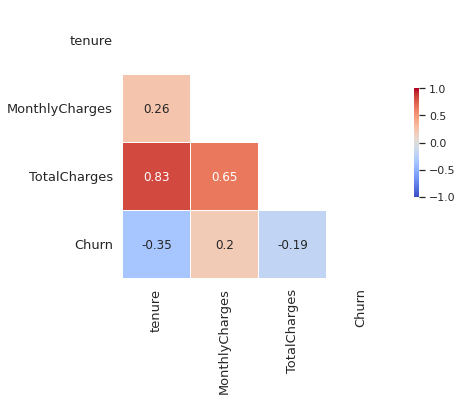

**Tenure is moderately correlated Numerical Feature with Target**

In [ ]:
# Correlation Matrix
# only numerical output
corr_matrix = pd.concat([X[num_cols],strat_train_set[["Churn"]]],axis=1).corr()

# Set Up Mask To Hide Upper Triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0, fontsize=13)
ax.set_xticklabels(corr_matrix.columns, fontsize=13)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
plt.show()

printmd("**Tenure is moderately correlated Numerical Feature with Target**")

<a id='10'></a>
# 10 Modeling

<a id='10.1'></a>
## 10.1 Utility Function

<a id='10.1.1'></a>
### 10.1.1 Training

In [ ]:
def train_model(model, model_name, X, y, X_test, fold):
  printmd(f'**{model_name} Init**')
  auc_scores = []

  test_preds=None

  strat_kf = StratifiedKFold(n_splits=fold, random_state=SEED, shuffle=True)

  for fold, (train_index, valid_index) in enumerate(strat_kf.split(X, y)):
    X_train, X_valid = X.iloc[train_index] , X.iloc[valid_index]
    y_train, y_valid = y[train_index] , y[valid_index]


    #### to SMOTE sampling
    # sm = SMOTE(sampling_strategy='all', random_state=SEED)
    # X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    # X_val_oversampled, y_val_oversampled = sm.fit_resample(X_valid, y_valid)
 
    eval_set = [(X_valid, y_valid)]

    print("-" * 50)
    print(f"Fold {fold + 1}")

    if model_name == 'cat':
      model.fit(X_train, y_train, eval_set= eval_set, verbose=False)
    elif model_name == 'xgb':
      model.fit(X_train, y_train, eval_set= eval_set, eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
    else:
      model.fit(X_train, y_train, eval_set= eval_set, eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
    

    val_pred = model.predict_proba(X_valid)[:,1]
    auc = roc_auc_score(y_valid, val_pred) # AUROC requires probabilities of the predictions
    print("AUC Score : ",auc)

    auc_scores.append(auc)

    if test_preds is None:
      test_preds = model.predict_proba(X_test)[:,1] 
    else:
      test_preds += model.predict_proba(X_test)[:,1] 


    del X_train, y_train, X_valid, y_valid
    gc.collect()
      
  print("-" * 50)
  test_preds /= fold

  print(f'Train : Base Model - {model_name} - AUC score : mean ---> {np.mean(auc_scores)}, std ---> {np.std(auc_scores)}')
  
  # evaluation on test set
  print(f'Test  : Base Model - {model_name} - AUC score : {roc_auc_score(y_test, test_preds)}')

  del test_preds
  gc.collect()
  
  print('Done!')

  if model_name == 'cat':
    plot_feature_importance(model.get_feature_importance(), X.columns, model_name)
    model.save_model("model_catboost")

  elif model_name == 'xgb':
    plot_feature_importance(model.feature_importances_, X.columns, model_name)

    # https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html
    # save the model
    model.save_model('model_xgb.json')

  else:
    plot_feature_importance(model.feature_importances_, X.columns, model_name)
    model.booster_.save_model('model_lgbm.txt') 
    joblib.dump(model, 'model_lgbm.pkl')
    # shap_values = shap.TreeExplainer(model.booster_).shap_values(X_train)



<a id='10.1.2'></a>
### 10.1.2 Model Interpretation

In [ ]:
# https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8),dpi=100)
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

# credit : https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

<a id='10.2'></a>
## 10.2 Catboost

<a id='10.2.1'></a>
### 10.2.1 Training

**cat Init**

--------------------------------------------------
Fold 1
AUC Score :  0.8276489533011271
--------------------------------------------------
Fold 2
AUC Score :  0.862157809983897
--------------------------------------------------
Fold 3
AUC Score :  0.8367069243156201
--------------------------------------------------
Fold 4
AUC Score :  0.8323752012882448
--------------------------------------------------
Fold 5
AUC Score :  0.842330512596051
--------------------------------------------------
Fold 6
AUC Score :  0.8562558765360049
--------------------------------------------------
Fold 7
AUC Score :  0.8706351522225464
--------------------------------------------------
Fold 8
AUC Score :  0.857812145381448
--------------------------------------------------
Fold 9
AUC Score :  0.8553156307752164
--------------------------------------------------
Fold 10
AUC Score :  0.8699354317998387
--------------------------------------------------
Train : Base Model - cat - AUC score : mean ---> 0.

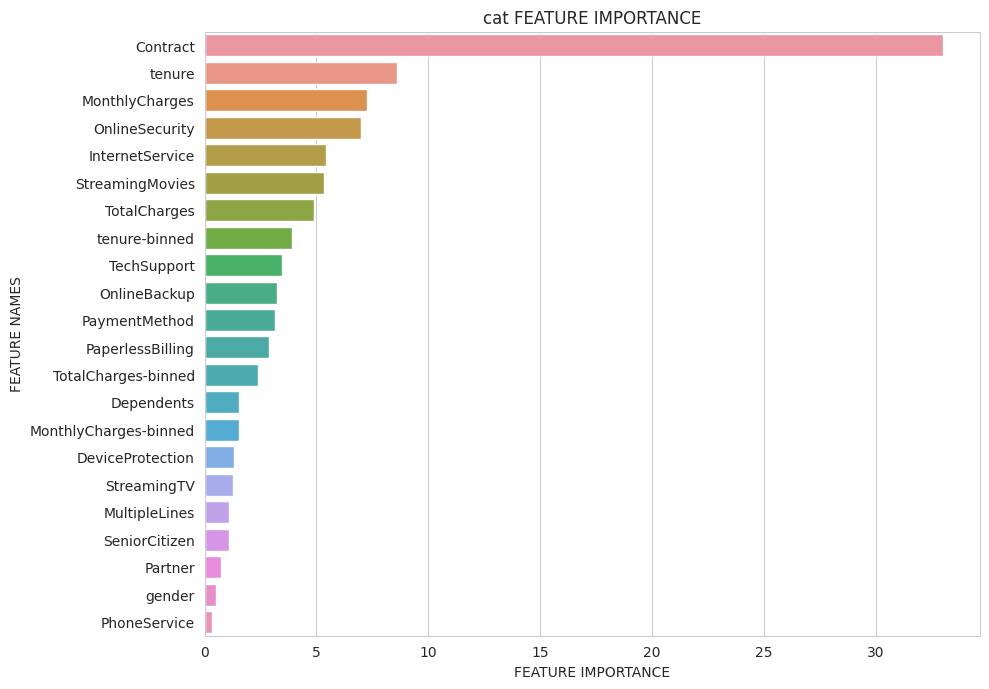

In [ ]:
%%time
# https://catboost.ai/en/docs/concepts/speed-up-training

# this dataset is fairly small so catboost runs super slow on GPU
# https://github.com/catboost/catboost/issues/1034


fold_num = 10

# convert datatype to integer to use 'cat_features' parameter
# does not improve score
# for c in cat_cols:
#     X[c] = X[c].astype(np.int)
#     X_test[c] = X_test[c].astype(np.int)

cat_params  = {
    'eval_metric':"AUC",
    'loss_function': 'logloss',
    'objective': 'Logloss',
    'boosting_type': 'Plain',
    'bootstrap_type': 'Bayesian', 
    'colsample_bylevel': 0.013457968759952536, # does not support on gpu https://catboost.ai/en/docs/references/training-parameters/common#rsm
    'depth': 6,
    'iterations': 6888,
    'learning_rate': 0.05683590866750785,
    'random_strength': 18, 
    'l2_leaf_reg': 50,
    'random_state': SEED,
    # 'task_type':"GPU",
    'devices' : '0',
    # 'cat_features':cat_cols
    }


cat = CatBoostClassifier(**cat_params)

train_model(cat, 'cat', X, y, X_test, fold_num)


# After tune with catboost 200 trial+all featuer + standard scaler Best tuning Score:  0.8414050995892428

# Train : Base Model - cat - AUC score : mean ---> 0.8511173638199994, std ---> 0.01460379925370074
# Test  : Base Model - cat - AUC score : 0.8472435350951975

<a id='10.2.2'></a>
### 10.2.2 Optuna Tuning

In [ ]:
%%time
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)
    
    # parameters
    params = {
        'iterations' : trial.suggest_int('iterations', 6000, 8000), 
        'depth' : trial.suggest_int('depth', 3, 12),
        'learning_rate' :trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        "objective": trial.suggest_categorical("objective", ["Logloss"]),
        'colsample_bylevel': trial.suggest_float("colsample_bylevel", 0.01, 0.1), #  # does not support on gpu 
        'random_strength' :trial.suggest_int('random_strength', 0, 100),   
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]  # https://catboost.ai/en/docs/concepts/algorithm-main-stages_bootstrap-options
        ),
        'random_state': trial.suggest_categorical('random_state',[SEED]),
    }

    # learning
    model = CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="AUC",
        # task_type="GPU",
        l2_leaf_reg=50,
#         border_count=64,
        **params
    )        
    model.fit(X_train, y_train, 
              verbose=False) # 1000
    val_preds = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, val_preds) # AUROC requires probabilities of the predictions
    # print("AUC Score : ",auc) # check the auc score in each trial
    
    return auc

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.9 µs


In [ ]:
%%time
n_trials = int(200)

# set logging level
optuna.logging.set_verbosity(optuna_verbosity)

study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**CatBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

**BEST TRIAL**

Best Score:  0.8408703402309541


**CatBoost Tuned Hyperparameters**

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'colsample_bylevel': 0.013745649174808978,
 'depth': 4,
 'iterations': 7747,
 'learning_rate': 0.031597637482588814,
 'objective': 'Logloss',
 'random_state': 42,
 'random_strength': 6}
CPU times: user 37min 37s, sys: 10min 5s, total: 47min 42s
Wall time: 24min 22s


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('CatBoost_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)

printmd('**CatBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.8408703402309541


**CatBoost Tuned Hyperparameters**

{'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'colsample_bylevel': 0.013745649174808978,
 'depth': 4,
 'iterations': 7747,
 'learning_rate': 0.031597637482588814,
 'objective': 'Logloss',
 'random_state': 42,
 'random_strength': 6}


<a id='10.3'></a>
## 10.3 XGBoost

<a id='10.3.1'></a>
### 10.3.1 Training

**xgb Init**

--------------------------------------------------
Fold 1
AUC Score :  0.8275684380032206
--------------------------------------------------
Fold 2
AUC Score :  0.8638969404186795
--------------------------------------------------
Fold 3
AUC Score :  0.8290177133655394
--------------------------------------------------
Fold 4
AUC Score :  0.8265700483091788
--------------------------------------------------
Fold 5
AUC Score :  0.8417550173459133
--------------------------------------------------
Fold 6
AUC Score :  0.8553561586097331
--------------------------------------------------
Fold 7
AUC Score :  0.8672956586583666
--------------------------------------------------
Fold 8
AUC Score :  0.8600735985474826
--------------------------------------------------
Fold 9
AUC Score :  0.8424439905326979
--------------------------------------------------
Fold 10
AUC Score :  0.86590799031477
--------------------------------------------------
Train : Base Model - xgb - AUC score : mean ---> 0

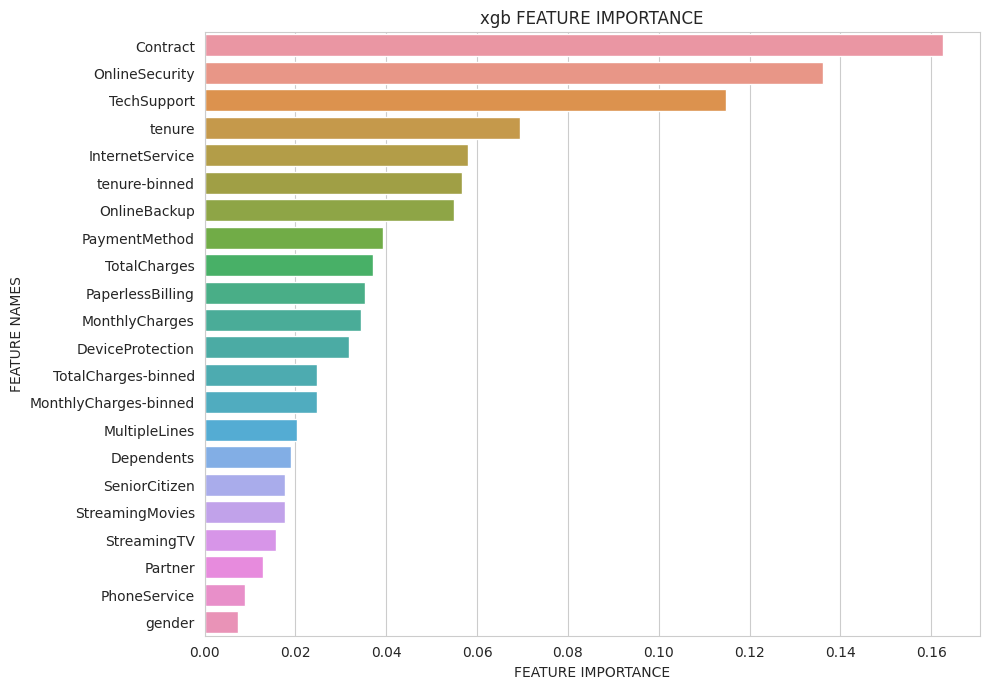

In [ ]:
%%time
fold_num = 10


xgb_params = {'colsample_bytree': 0.2645340949128848,
'eval_metric': 'auc',
# 'tree_method': 'gpu_hist',
# 'gpu_id': 0,
# 'predictor': 'gpu_predictor',
'gamma': 0,
'learning_rate': 0.001851851953410451,
'max_depth': 3,
'n_estimators': 6000,
'random_state': SEED,
'reg_lambda': 0.1,
'subsample': 0.6905005604726816,
'use_label_encoder': False }


xgb = XGBClassifier(**xgb_params)

train_model(xgb, 'xgb', X, y, X_test, fold_num)


# https://stackoverflow.com/questions/51022822/subsample-colsample-bytree-colsample-bylevel-in-xgbclassifier-python-3-x


# optuna tune with xgboost+all featuer + standard scaler 200 trial min-max, 6000 estimators - score 0.8410150094293316

## Min-max scaler
# Train : Base Model - xgb - AUC score : mean ---> 0.8479836989787929, std ---> 0.01566122703346753
# Test  : Base Model - xgb - AUC score : 0.8468379446640315

## Robust scaler --- better score
# Train : Base Model - xgb - AUC score : mean ---> 0.8479885554105582, std ---> 0.015660468150610223
# Test  : Base Model - xgb - AUC score : 0.8468431114211165

<a id='10.3.2'></a>
### 10.3.2 Optuna Tuning

In [ ]:
%%time
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)

    params  = {
          'n_estimators': trial.suggest_categorical('n_estimators',[10000]),  
          'learning_rate': trial.suggest_float('learning_rate',1e-3,5e-1,log=True),
          'max_depth': trial.suggest_int('max_depth',3,12),
          'colsample_bytree': trial.suggest_float('colsample_bytree',0.2,0.99,log=True),
          'subsample': trial.suggest_float('subsample',0.2,0.99,log=True),
          'eval_metric': trial.suggest_categorical('eval_metric',['auc']),
          'use_label_encoder':trial.suggest_categorical('use_label_encoder',[False]),
          'gamma': trial.suggest_categorical('gamma',[0, 0.25, 0.5, 1.0]),
          'reg_lambda': trial.suggest_categorical('reg_lambda',[0.1, 1.0, 5.0, 10.0, 50.0, 100.0]),
          'tree_method': trial.suggest_categorical('tree_method',['gpu_hist']),
          'gpu_id': trial.suggest_categorical('gpu_id',[0]),
          'predictor' : trial.suggest_categorical('predictor',['gpu_predictor']),
          'random_state': trial.suggest_categorical('random_state',[SEED])
         }

    # learning
    model = XGBClassifier(**params)        
    model.fit(X_train, y_train, 
              verbose=False) # 1000
    val_preds = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, val_preds) # AUROC requires probabilities of the predictions
    # print("AUC Score : ",auc) # check the auc score in each trial
    
    return auc

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [ ]:
%%time
n_trials = int(200)

# set logging level
optuna.logging.set_verbosity(optuna_verbosity)

study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**XGBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

**BEST TRIAL**

Best Score:  0.8392996460771397


**XGBoost Tuned Hyperparameters**

{'colsample_bytree': 0.2697936102157226,
 'eval_metric': 'auc',
 'gamma': 1.0,
 'learning_rate': 0.002737720923925648,
 'max_depth': 6,
 'n_estimators': 10000,
 'random_state': 42,
 'reg_lambda': 50.0,
 'subsample': 0.44690164583146236,
 'use_label_encoder': False}
CPU times: user 2h 52min 20s, sys: 51.6 s, total: 2h 53min 12s
Wall time: 1h 28min 1s


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('XGB_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)

printmd('**XGBoost Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)


# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.8392996460771397


**XGBoost Tuned Hyperparameters**

{'colsample_bytree': 0.2697936102157226,
 'eval_metric': 'auc',
 'gamma': 1.0,
 'learning_rate': 0.002737720923925648,
 'max_depth': 6,
 'n_estimators': 10000,
 'random_state': 42,
 'reg_lambda': 50.0,
 'subsample': 0.44690164583146236,
 'use_label_encoder': False}


<a id='10.4'></a>
## 10.4 LGBM

<a id='10.4.1'></a>
### 10.4.1 Training

**lgbm Init**

--------------------------------------------------
Fold 1
AUC Score :  0.826014492753623
--------------------------------------------------
Fold 2
AUC Score :  0.861940418679549
--------------------------------------------------
Fold 3
AUC Score :  0.8340016103059581
--------------------------------------------------
Fold 4
AUC Score :  0.8272785829307568
--------------------------------------------------
Fold 5
AUC Score :  0.8418603897156567
--------------------------------------------------
Fold 6
AUC Score :  0.8541160068735206
--------------------------------------------------
Fold 7
AUC Score :  0.8632752974743052
--------------------------------------------------
Fold 8
AUC Score :  0.8567746328178193
--------------------------------------------------
Fold 9
AUC Score :  0.8567178938494958
--------------------------------------------------
Fold 10
AUC Score :  0.8676594027441485
--------------------------------------------------
Train : Base Model - lgbm - AUC score : mean ---> 

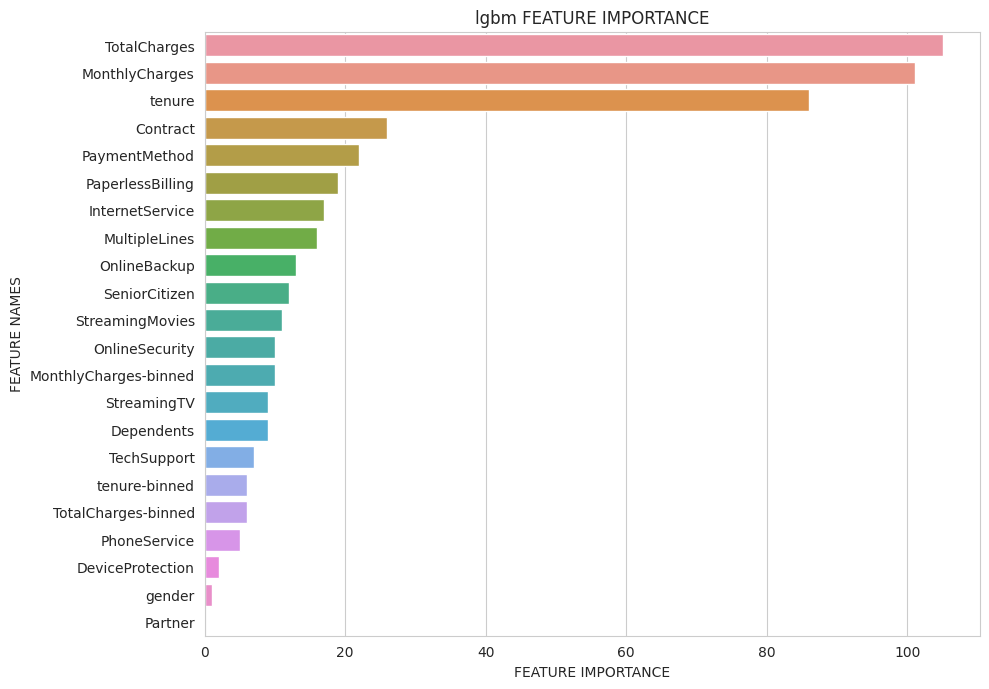

In [ ]:
%%time
# highly recommended : https://neptune.ai/blog/lightgbm-parameters-guide

fold_num = 10

# convert datatype to category to use 'categorical_feature' parameter
# does not improve score
# for c in cat_cols:
#     X[c] = X[c].astype('category')
#     X_test[c] = X_test[c].astype('category')

lgbm_params = {'n_estimators': 12749, 
               'learning_rate': 0.1985328656822506, 
               'reg_alpha': 9.77289653841389, 
               'reg_lambda': 4.979048257991328, 
               'num_leaves': 921, 
               'min_child_samples': 85, 
               'max_depth': 56, 
               'colsample_bytree': 0.43848926369957975, 
               'cat_smooth': 92, 
               'cat_l2': 17, 
              #  'is_unbalance':True,  # does not improve score
              # 'categorical_feature': cat_cols, # does not improve score
               'min_data_per_group': 59}


lgbm = LGBMClassifier(**lgbm_params)

train_model(lgbm, 'lgbm', X, y, X_test, fold_num)

# high score with robust scaler > min-max scaler > standard scaler 
## min-max
# Train : Base Model - lgbm - AUC score : mean ---> 0.8488136576486445, std ---> 0.014531097746514104
# Test  : Base Model - lgbm - AUC score : 0.8496602857216667
## Robustscaler
# Train : Base Model - lgbm - AUC score : mean ---> 0.8489638728144833, std ---> 0.014634419602993266
# Test  : Base Model - lgbm - AUC score : 0.8498656643157922

<a id='10.4.2'></a>
### 10.4.2 Optuna Tuning

In [ ]:
%%time
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=int(SEED), shuffle=True, stratify=y)

    params = {
        'objective': 'binary', # binary target
        'n_estimators': trial.suggest_int('n_estimators', 4000, 20000),
        'learning_rate' : trial.suggest_float('learning_rate',1e-3,5e-1,log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000), # num leaves = 2^max_depth
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        'random_state': int(SEED),
        'device': 'gpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0,
        
        #     'subsample': 0.6,
        #     'subsample_freq': 1,
        #     'min_child_weight': trial.suggest_float('min_child_weight', 0.001, 10.0),
    }

    # Learning
    model = LGBMClassifier(**params)        
    model.fit(X_train, y_train, 
              verbose=False) # 1000
    val_pred = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, val_pred) # AUROC requires probabilities of the predictions

    # print("AUC Score : ",auc) # check the auc score in each trial
    
    return auc

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 13.4 µs


In [ ]:
%%time
n_trials = int(200)

# set logging level
optuna.logging.set_verbosity(optuna_verbosity)

study = optuna.create_study(direction = "maximize", sampler = optuna.samplers.TPESampler(seed=int(SEED)))
study.optimize(objective, n_trials = n_trials, n_jobs = multiprocessing.cpu_count())

printmd('**BEST TRIAL**')
print("Best Score: ", study.best_value)
printmd('**LGBM Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

**BEST TRIAL**

Best Score:  0.840249037691493


**LGBM Tuned Hyperparameters**

{'cat_l2': 4,
 'cat_smooth': 51,
 'colsample_bytree': 0.3510571513666366,
 'learning_rate': 0.009922932097926985,
 'max_depth': 55,
 'min_child_samples': 92,
 'min_data_per_group': 136,
 'n_estimators': 19716,
 'num_leaves': 664,
 'reg_alpha': 5.741383155357118,
 'reg_lambda': 2.215959712136253}
CPU times: user 39min 46s, sys: 8min 29s, total: 48min 16s
Wall time: 24min 44s


In [ ]:
# Save
pickle.dump(study.best_trial.params, open('LGBM_Hyperparameter.pickle', 'wb'))
print("Best Score: ", study.best_value)
printmd('**LGBM Tuned Hyperparameters**')
pprint.pprint(study.best_trial.params)

# history
display(optuna.visualization.plot_optimization_history(study))

# Importance
display(plot_param_importances(study))

Best Score:  0.840249037691493


**LGBM Tuned Hyperparameters**

{'cat_l2': 4,
 'cat_smooth': 51,
 'colsample_bytree': 0.3510571513666366,
 'learning_rate': 0.009922932097926985,
 'max_depth': 55,
 'min_child_samples': 92,
 'min_data_per_group': 136,
 'n_estimators': 19716,
 'num_leaves': 664,
 'reg_alpha': 5.741383155357118,
 'reg_lambda': 2.215959712136253}


<a id='10.5'></a>
## 10.5 Stacking Ensemble

---
![image.png](http://rasbt.github.io/mlxtend/user_guide/classifier/StackingClassifier_files/stackingclassification_overview.png)

In [ ]:
def stacking_data_loader(model, model_name, train, y, test, fold):
    '''
    input train, test datasets and fold value!
    returns train, test datasets for stacking ensemble
    '''

    stk = StratifiedKFold(n_splits = fold, random_state = SEED, shuffle = True)
    
    # Declaration Pred Datasets
    train_fold_pred = np.zeros((train.shape[0], 1))
    test_pred = np.zeros((test.shape[0], fold))
    
    for counter, (train_index, valid_index) in enumerate(stk.split(train, y)):
        X_train, y_train = train.iloc[train_index], y[train_index]
        X_valid, y_valid = train.iloc[valid_index], y[valid_index]

        print('------------ Fold', counter+1, 'Start! ------------')
        if model_name == 'cat':
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
        elif model_name == 'xgb':
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
        else:
            model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], eval_metric = 'auc', verbose = False, early_stopping_rounds = 200)
            
        print('------------ Fold', counter+1, 'Done! ------------')
        
        train_fold_pred[valid_index, :] = model.predict_proba(X_valid)[:, 1].reshape(-1, 1)
        test_pred[:, counter] = model.predict_proba(test)[:, 1]
        del X_train, y_train, X_valid, y_valid
        gc.collect()
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    del test_pred
    gc.collect()
    
    print('Done!')
    
    return train_fold_pred, test_pred_mean

<a id='10.5.1'></a>
### 10.5.1 Level 0 : Base Models

In [ ]:
%%time
lgbm_params = {'n_estimators': 12749, 
               'learning_rate': 0.1985328656822506, 
               'reg_alpha': 9.77289653841389, 
               'reg_lambda': 4.979048257991328, 
               'num_leaves': 921, 
               'min_child_samples': 85, 
               'max_depth': 56, 
               'colsample_bytree': 0.43848926369957975, 
               'cat_smooth': 92, 
               'cat_l2': 17, 
              #  'is_unbalance':True,  # does not improve score
              # 'categorical_feature': cat_cols, # does not improve score
               'min_data_per_group': 59}


lgbm = LGBMClassifier(**lgbm_params)


xgb_params = {'colsample_bytree': 0.2645340949128848,
              'eval_metric': 'auc',
              'gamma': 0,
              'learning_rate': 0.001851851953410451,
              'max_depth': 3,
              'n_estimators': 6000,
              'random_state': SEED,
              'reg_lambda': 0.1,
              'subsample': 0.6905005604726816,
              'use_label_encoder': False }

xgb = XGBClassifier(**xgb_params)


cat_params  = {'eval_metric':"AUC",
              #  'task_type':"GPU",
              'loss_function': 'logloss',
              'boosting_type': 'Plain',
              'bootstrap_type': 'Bayesian', # 0.846998114133664
              'colsample_bylevel': 0.013457968759952536,
              'depth': 6,
              'iterations': 6888,
              'learning_rate': 0.05683590866750785,
              'objective': 'Logloss',
              'random_strength': 18, 
              'l2_leaf_reg': 50,
              'random_state': SEED,
              # 'cat_features':cat_cols
              }


cat = CatBoostClassifier(**cat_params)

fold_num = 5

cat_train, cat_test = stacking_data_loader(cat, 'cat', X, y, X_test, fold_num)
del cat
gc.collect()

lgbm_train, lgbm_test = stacking_data_loader(lgbm, 'lgbm', X, y, X_test, fold_num)
del lgbm
gc.collect()

xgb_train, xgb_test = stacking_data_loader(xgb, 'xgb', X, y, X_test, fold_num)
del xgb
gc.collect()


------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------
------------ Fold 3 Done! ------------
------------ Fold 4 Start! ------------
------------ Fold 4 Done! ------------
------------ Fold 5 Start! ------------
------------ Fold 5 Done! ------------
Done!
------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------
------------ Fold 3 Done! ------------
------------ Fold 4 Start! ------------
------------ Fold 4 Done! ------------
------------ Fold 5 Start! ------------
------------ Fold 5 Done! ------------
Done!
------------ Fold 1 Start! ------------
------------ Fold 1 Done! ------------
------------ Fold 2 Start! ------------
------------ Fold 2 Done! ------------
------------ Fold 3 Start! ------------


<a id='10.5.2'></a>
### 10.5.2 Stacking Datasets

In [ ]:
stack_X_train = np.concatenate((cat_train, lgbm_train, xgb_train), axis = 1)
stack_X_test = np.concatenate((cat_test, lgbm_test, xgb_test), axis = 1)

del cat_train, lgbm_train, xgb_train, cat_test, lgbm_test, xgb_test
gc.collect()

stack_X_train.shape, stack_X_test.shape

((5634, 3), (1409, 3))

<a id='10.5.3'></a>
### 10.5.3 Level 1 : Meta Model

Fold 1 AUC : 0.8662974811368007
Fold 2 AUC : 0.8599841662223515
Fold 3 AUC : 0.8527337501817653
Fold 4 AUC : 0.8441342316578612
Fold 5 AUC : 0.8243803407569771
AUC score : mean ---> 0.8495059939911511, std ---> 0.014576136833225574


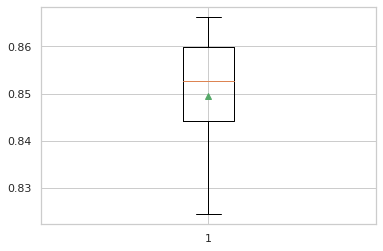

In [ ]:
# meta model : LogisticRegression
fold = 5
stk = StratifiedKFold(n_splits = fold, random_state = SEED, shuffle = False)
test_pred_log_reg = np.zeros((stack_X_test.shape[0], fold))
auc_scores = []

for counter, (train_index, valid_index)in enumerate(stk.split(stack_X_train, y)):
    X_train, y_train = stack_X_train[train_index], y[train_index]
    X_valid, y_valid = stack_X_train[valid_index], y[valid_index]

    #### to SMOTE sampling, not advised, low performance
    # sm = SMOTE(sampling_strategy='all', random_state=SEED)
    # X_train, y_train = sm.fit_resample(X_train, y_train)
    # X_valid, y_valid = sm.fit_resample(X_valid, y_valid)
    
    lr = LogisticRegression(n_jobs = -1, random_state = SEED, C = 0.05, max_iter = 3000)
    lr.fit(X_train, y_train)
    
    valid_pred_log_reg = lr.predict_proba(X_valid)[:, 1]
    test_pred_log_reg[:, counter] = lr.predict_proba(stack_X_test)[:, 1]

    auc = roc_auc_score(y_valid, valid_pred_log_reg)
    auc_scores.append(auc)

    print('Fold', counter+1 , 'AUC :', auc)
    fold += 1

test_pred_log_reg_mean = np.mean(test_pred_log_reg, axis = 1).reshape(-1, 1)

print(f'AUC score : mean ---> {np.mean(auc_scores)}, std ---> {np.std(auc_scores)}')

plt.boxplot(auc_scores, showmeans=True)

plt.show()

# AUC score : mean ---> 0.8495059939911511, std ---> 0.014576136833225574

<a id='10.5.4'></a>
### 10.5.4 Stacking Model Evaluation

In [ ]:
roc_auc_score_log_reg = roc_auc_score(y_test, test_pred_log_reg_mean)

printmd(f"AUC on the test dataset : **{roc_auc_score_log_reg}**")

# 5 fold , final 10 fold 0.8472861608411479
# 10 fold 0.8471776589423647
# 7 fold 0.8466325660699062
# all round 5 fold 0.8486346844403111

AUC on the test dataset : **0.8486346844403111**

#### ROC Curve

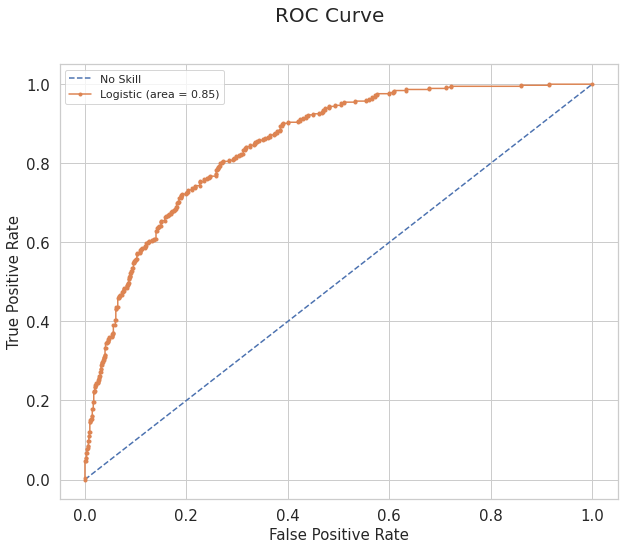

In [ ]:
plt.figure(figsize=(10,8))

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, test_pred_log_reg_mean)

# plot model roc curve
font_size = 15
plt.plot(fpr, tpr, marker='.', label=f'Logistic (area = {roc_auc_score_log_reg:0.2f})')

# axis labels
plt.xlabel('False Positive Rate', fontsize=font_size)
plt.ylabel('True Positive Rate', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# curve title
plt.suptitle('ROC Curve', fontsize=20)
# show the legend
plt.legend()

# show the plot
plt.show()

#### PR Curve

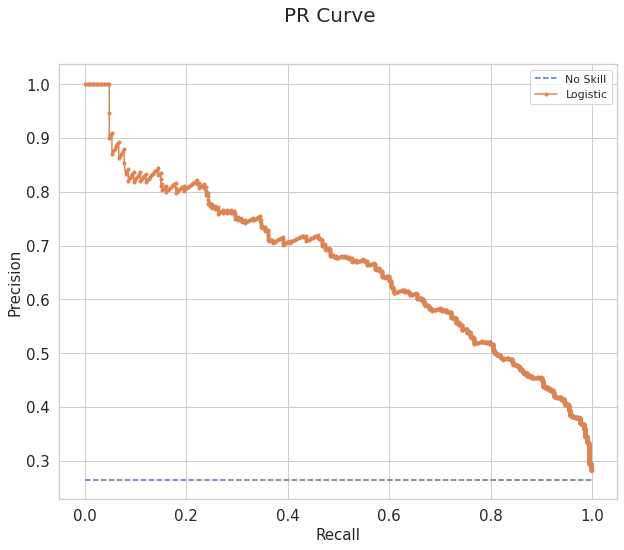

In [ ]:
plt.figure(figsize=(10,8))

# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, test_pred_log_reg_mean)

# plot the model precision-recall curve
font_size = 15
plt.plot(recall, precision, marker='.', label='Logistic')

# title PR curve
plt.suptitle('PR Curve', fontsize=20)

# axis labels
plt.xlabel('Recall', fontsize=font_size)
plt.ylabel('Precision', fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
# show the legend
plt.legend()

# show the plot
plt.show()

<a id='10.5.5'></a>
### 10.5.5 Stacking Ensemble Classic ML Models

**Model Evaluation :**

>logreg, cross-validation score - mean  : 0.805 std: (0.019)
>knn, cross-validation score - mean  : 0.762 std: (0.015)
>rforest, cross-validation score - mean  : 0.793 std: (0.018)
>etree, cross-validation score - mean  : 0.783 std: (0.014)
>svm, cross-validation score - mean  : 0.797 std: (0.018)
>stacking, cross-validation score - mean  : 0.805 std: (0.019)


<br>

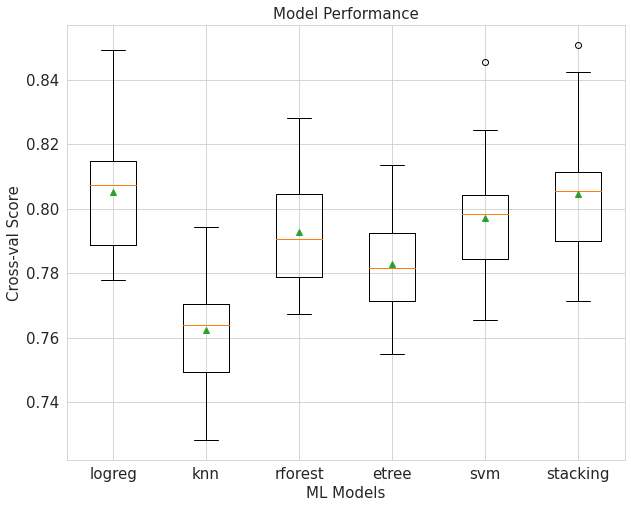

In [ ]:
# 5 fold stacking ensembling with 3 Repeated Stratified 10-Fold cross validation

# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('logreg', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('rforest', RandomForestClassifier()))
  level0.append(('etree', ExtraTreesClassifier()))
  level0.append(('svm', SVC()))

  # define meta learner model
  level1 = LogisticRegression()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['logreg'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['rforest'] = RandomForestClassifier()
  models['etree'] = ExtraTreesClassifier()
  models['svm'] = SVC()
  models['stacking'] = get_stacking()
  return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()

printmd("**Model Evaluation :**")

for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s, cross-validation score - mean  : %.3f std: (%.3f)' % (name, np.mean(scores), np.std(scores)))
 
printmd("<br>")

# plot model performance for comparison
font_size = 15
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)

plt.title("Model Performance",  fontsize=font_size)
plt.xlabel("ML Models", fontsize=font_size)
plt.ylabel("Cross-val Score",  fontsize=font_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

plt.show()


# credit : https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python

**Classic ML models perform poorly in comparison with Gradient Boosting models**

<a id='11'></a>
# 11 Conclusion

* Number of months the customer has stayed with the company (**tenure**) and the contract term of the customer (**contract**) are the most important features that have strong correlation with churn of the customer 
* Results from statiscial hypotheses testing reflects **similarity** with model feature importance
* With 80/20 train/test split triple boosting stacking ensemble model achieved an AUC of **~0.85**




<a id='12'></a>
# 12 Reference



1. [statstest](https://www.statstest.com/relationship)
2. [parametric nonparametric tests healthknowledge - healthknowledge.org](https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/parametric-nonparametric-tests)
3. [Feature Selection Method For Machine Learning - machinelearningmastery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data)
4. [The Search for Categorical Correlation - towardsdatascience](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
5. [nonparametric statistical significance](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
6. [eta-squared - ResearchGate](https://www.researchgate.net/post/Can_I_use_Pearsons_correlation_coefficient_to_know_the_relation_between_perception_and_gender_age_income)
7. [T-test examples - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/07/t-test-performing-hypothesis-testing-with-python/)
8. [Nonparametric Statistical Hypothesis Tests - machinelearningmastery](https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/)
9. [kendalls-tau](https://www.statstest.com/kendalls-tau/)
10. [Chi-Squared Test for Machine Learning](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)
11. [parametric-and-non-parametric-data](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/)
12. [mann-whitney-u-test for non-parametric](https://www.statisticshowto.com/mann-whitney-u-test/)
13. [Point-biserial correlation, Phi, & Cramer's V](http://web.pdx.edu/~newsomj/pa551/lectur15.htm)
14. [Theia's Uncertainity](https://en.wikipedia.org/wiki/Uncertainty_coefficient)
15. [non-parametric-correlation-for-continuous-and-dichotomous-variables](https://stats.stackexchange.com/questions/86637/non-parametric-correlation-for-continuous-and-dichotomous-variables)
16. [Effect Size Wiki](https://en.wikipedia.org/wiki/Effect_size)
17. [categorical correlation](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
18. [correlation_ratio dython](http://shakedzy.xyz/dython/modules/nominal/#correlation_ratio)
19. [7. Tetrachoric’s correlation](https://junye0798.com/post/everythin-you-need-to-know-about-correlation/)
20. [chi-square](http://web.pdx.edu/~newsomj/pa551/lectur11.htm)
21. [kruskal-wallis - statisticshowto](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kruskal-wallis/)
22. [Everything You Need To Know About Correlation](https://junye0798.com/post/everythin-you-need-to-know-about-correlation)
